# **Introducción**

En el contexto actual de análisis de datos, el Análisis Exploratorio de Datos (EDA) emerge como una herramienta fundamental para comprender las complejas interrelaciones entre variables socioeconómicas y ambientales a nivel global. En este estudio, se propone realizar un exhaustivo análisis exploratorio de datos con el fin de investigar y comprender las dinámicas que caracterizan el desarrollo humano, económico y ambiental de los países hasta el año 2023.

**Objetivos:**

- Explorar relaciones entre indicadores: Identificar y analizar conexiones entre indicadores socioeconómicas y ambientales para comprender mejor su interacción en el desarrollo de los países.
- Detectar patrones y tendencias: Utilizar técnicas de estadística descriptiva y visualización para identificar patrones significativos en los datos y comprender posibles disparidades.
- Evaluar influencia geográfica: Examinar cómo factores geográficos pueden influir en las relaciones entre variables y en el desarrollo de los países, centrándonos en patrones continentales.

**Conjunto de datos:**

Los datos provienen de Kaggle de los siguientes dos conjuntos de datos:
- Principal: https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023, el cual contiene los indicadores por país.
- Complemento: https://www.kaggle.com/datasets/andradaolteanu/country-mapping-iso-continent-region, el cual complementa la identificación del continente y la subregión de cada país.

A continuación son las variables consideradas para el Análisis Exploratorio de Datos (EDA):
- **País:** Nombre de país
- **Densidad_(P/Km2):** Densidad de población medida en personas por kilómetro cuadrado.
- **Tierra_Agricola_(%):** Porcentaje de la superficie de tierra utilizada con fines agrícolas.
- **IPC:** Índice de precios al consumo, una medida de la inflación y el poder adquisitivo.
- **Area_Forestal_(%):** Porcentaje de la superficie terrestre cubierta por bosques.
- **Precio_Gasolina:** Precio de la gasolina por litro en USD.
- **Edu_Primaria_(%):** Tasa bruta de matriculación en educación primaria.
- **Edu_Terciaria_(%):** Tasa bruta de matriculación en educación terciaria.
- **Gasto_en_Salud:** Porcentaje del gasto sanitario total pagado de bolsillo por los individuos.
- **Fuerza_Laboral_(%):** Porcentaje de la población que forma parte de la población activa.
- **Tasa_Desempleo:** Porcentaje de la población activa que está en paro.
- **Salario_Minimo:** Salario mínimo en USD.
- **Esperanza_de_Vida:** Número medio de años que se espera que viva una persona.
- **Medicos_x1000_hab:** Número de médicos por cada mil habitantes.
- **Tasa_Fertilidad:** Número medio de hijos nacidos de una mujer a lo largo de su vida.
- **Población:** Población total del país.
- **Fuerzas_Armadas:** Tamaño de las fuerzas armadas del país.
- **Emisiones_CO2:** Emisiones de dióxido de carbono en toneladas.
- **PIB:** Producto Interior Bruto, el valor total de los bienes y servicios producidos en el  país por USD.
- **Id:** Abreviatura o código que representa al país
- **Region:** Continente
- **Subregion:** Regiones de cada continente

# **Inicial**

##### **Importar librerias**

In [1]:
import pandas as pd             # Manipulación de datos
import numpy as np              # Manipulación de arrays
import matplotlib.pyplot as plt # Gráficos matplotlib
import seaborn as sns           # Gráficos seaborn
import plotly.express as px     # Gráficos plotly
import folium                   # Gráficos georeferenciados
import requests                 # Para datos georeferenciados
import missingno                # Revisión de datos atípicos

from sklearn.preprocessing import RobustScaler  # Escalar con RobustScaler
from sklearn.preprocessing import OneHotEncoder # Convertir a variables dummies
from sklearn.impute import SimpleImputer        # Imputación con Regresión Multiple Simple
from kaggle.api.kaggle_api_extended import KaggleApi    # Importar datos de Kaggle

##### **Descargar dataframes**

In [2]:
# Antes de ejecutar este ipynb, asegúrarse de que kaggle.json esté en el directorio apropiado
api = KaggleApi()   # Crear una instancia del cliente API de Kaggle
api.authenticate()  # Autentícarse con sus credenciales de la API de Kaggle

dataset_principal = "nelgiriyewithana/countries-of-the-world-2023"
dataset_countries = 'andradaolteanu/country-mapping-iso-continent-region'

# Descargar dataset
api.dataset_download_files(dataset=dataset_principal, path="./", unzip=True)
api.dataset_download_files(dataset=dataset_countries, path="./", unzip=True)

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023
Dataset URL: https://www.kaggle.com/datasets/andradaolteanu/country-mapping-iso-continent-region


##### **Cargar dataframes**

In [3]:
# Cargar dataframe de regiones 
#  el complemento es para las categorias sin clasificar

regiones = pd.read_csv('continents2.csv')[['name','region','sub-region','alpha-3']]
regiones_comp = pd.DataFrame({'name': ['The Bahamas', 'Bosnia and Herzegovina', 'Brunei', 'Ivory Coast', 'Cape Verde', 'Republic of the Congo',
                                    'Democratic Republic of the Congo', 'The Gambia', 'Guinea-Bissau', 'Republic of Ireland',
                                    'Federated States of Micronesia', 'North Korea', 'S�����������', 'East Timor'],
                            'region': ['Americas', 'Europe', 'Asia', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Europe',
                                    'Oceania', 'Asia', 'Africa', 'Asia'],
                            'sub-region': ['Latin America and the Caribbean', 'Southern Europe', 'South-eastern Asia', 'Western Africa',
                                    'Western Africa', 'Middle Africa', 'Middle Africa', 'Western Africa', 'Western Africa',
                                    'Northern Europe', 'Micronesia', 'Eastern Asia', 'Middle Africa', 'South-eastern Asia'],
                            'alpha-3': ['BHS', 'BIH', 'BRN', 'CIV', 'CPV', 'COG',
                                    'COD', 'GMB', 'GNB', 'IRL',
                                    'FSM', 'PRK', 'STP', 'TLS']})
Africa_subregion = pd.DataFrame({'Pais': ['Algeria','Angola','Benin','Botswana','Burkina Faso','Burundi','Ivory Coast','Cape Verde','Cameroon','Central African Republic','Chad','Comoros','Republic of the Congo',
                                        'Democratic Republic of the Congo','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','The Gambia','Ghana','Guinea','Guinea-Bissau','Kenya','Lesotho',
                                        'Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','S�����������','Senegal',
                                        'Sierra Leone','Somalia','South Africa','Sudan','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe','South Sudan','Seychelles'],
                                'Subregion': ['North Africa','Central Africa','West Africa','South Africa','West Africa','East Africa','West Africa','West Africa','Central Africa','Central Africa','Central Africa',
                                        'East Africa','Central Africa','Central Africa','East Africa','North Africa','Central Africa','East Africa','East Africa','Central Africa','West Africa','West Africa',
                                        'West Africa','West Africa','East Africa','South Africa','West Africa','North Africa','East Africa','East Africa','West Africa','West Africa','East Africa',
                                        'North Africa','East Africa','South Africa','West Africa','West Africa','East Africa','Central Africa','West Africa','West Africa','East Africa','South Africa',
                                        'North Africa','East Africa','West Africa','North Africa','East Africa','East Africa','East Africa','East Africa','East Africa']})

# # Concatenar bases de regiones
df_regiones = pd.concat([regiones,regiones_comp])

# # Corregir las subregiones de Africa
def get_africa_subregion(country):
    if country in Africa_subregion['Pais'].values:
        return Africa_subregion[Africa_subregion['Pais'] == country]['Subregion'].values[0]
    else:
        return None

df_regiones.loc[df_regiones['region'] == 'Africa', 'sub-region'] = df_regiones.loc[df_regiones['region'] == 'Africa', 'name'].apply(get_africa_subregion)

<div style="border: 2px dashed #7FA8F0; padding: 10px;">
  <p><span style="font-size: 3em;">&#128196;</span>Se realizan ajustes y se complementan los errores en el conjunto de datos adicional de regiones, el cual carece de estandarización. Además, se adapta a la falta de estandarización en la identificación de los países en el conjunto de datos principal
</div>

In [4]:
# Construir dataframe principal

# Cargar dataframe principal
df_1 = pd.read_csv('world-data-2023.csv', thousands=',', decimal='.')

# Seleccionar variables de interes
df_2 = df_1[['Country', 'Density\n(P/Km2)', 'Population', 'Agricultural Land( %)','Armed Forces size', 'Co2-Emissions', 'CPI', 'Fertility Rate','Forested Area (%)', 
             'Gasoline Price', 'GDP','Gross primary education enrollment (%)','Gross tertiary education enrollment (%)','Life expectancy', 'Minimum wage', 
             'Out of pocket health expenditure','Physicians per thousand', 'Population: Labor force participation (%)','Unemployment rate']]

# Unión
df_merged = df_2.merge(df_regiones,left_on='Country', right_on='name',how='left').drop('name',axis=1)

# Lista de nuevos nombres de columnas
nuevos_nombres_df = ['Pais', 'Densidad_(P/Km2)','Poblacion' ,'Tierra_Agricola_(%)', 'Fuerzas_Armadas', 'Emisiones_CO2', 'IPC', 'Tasa_Fertilidad', 'Area_Forestal_(%)', 
                    'Precio_Gasolina', 'PIB', 'Edu_Primaria_(%)', 'Edu_Terciaria_(%)', 'Esperanza_de_Vida', 'Salario_Minimo',
                    'Gasto_en_Salud', 'Medicos_x1000_hab', 'Fuerza_Laboral_(%)', 'Tasa_Desempleo', 'Region', 'Subregion','id']

# Renombrar columnas
df = df_merged.rename(columns=dict(zip(df_merged.columns, nuevos_nombres_df)))

# **Limpieza de datos**

### **Validación inicial**

##### **Vista inicial de los datos**

In [5]:
pd.set_option('display.max_columns', None)
df.sample(n=3)

,Pais,Densidad_(P/Km2),Poblacion,Tierra_Agricola_(%),Fuerzas_Armadas,Emisiones_CO2,IPC,Tasa_Fertilidad,Area_Forestal_(%),Precio_Gasolina,PIB,Edu_Primaria_(%),Edu_Terciaria_(%),Esperanza_de_Vida,Salario_Minimo,Gasto_en_Salud,Medicos_x1000_hab,Fuerza_Laboral_(%),Tasa_Desempleo,Region,Subregion,id
100,Luxembourg,242,645397.0,53.70%,2000.0,8988.0,115.09,1.37,35.70%,$1.19,"$71,104,919,108",102.30%,19.20%,82.1,$13.05,10.60%,3.01,59.30%,5.36%,Europe,Western Europe,LUX
9,Austria,109,8877067.0,32.40%,21000.0,61448.0,118.06,1.47,46.90%,$1.20,"$446,314,739,528",103.10%,85.10%,81.6,NaN,17.90%,5.17,60.70%,4.67%,Europe,Western Europe,AUT
74,Honduras,89,9746117.0,28.90%,23000.0,9813.0,150.34,2.46,40.00%,$0.98,"$25,095,395,475",91.50%,26.20%,75.1,$1.01,49.10%,0.31,68.80%,5.39%,Americas,Latin America and the Caribbean,HND


##### **Validar tipos de datos**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pais                 195 non-null    object 
 1   Densidad_(P/Km2)     195 non-null    int64  
 2   Poblacion            194 non-null    float64
 3   Tierra_Agricola_(%)  188 non-null    object 
 4   Fuerzas_Armadas      171 non-null    float64
 5   Emisiones_CO2        188 non-null    float64
 6   IPC                  178 non-null    float64
 7   Tasa_Fertilidad      188 non-null    float64
 8   Area_Forestal_(%)    188 non-null    object 
 9   Precio_Gasolina      175 non-null    object 
 10  PIB                  193 non-null    object 
 11  Edu_Primaria_(%)     188 non-null    object 
 12  Edu_Terciaria_(%)    183 non-null    object 
 13  Esperanza_de_Vida    187 non-null    float64
 14  Salario_Minimo       150 non-null    object 
 15  Gasto_en_Salud       188 non-null    obj

<div style="border: 2px dashed #7FA8F0; padding: 10px;">
  <p><span style="font-size: 3em;">&#128196;</span>En algunas columnas, los valores numéricos están siendo interpretados como tipo 'object' debido a la presencia de los símbolos '$' y '%' que los acompañan
</div>

##### **Ajustar formato de los datos**

In [7]:
# Eliminar simbolos de '$' y '%' y Convertir a float

for i in df.select_dtypes('object').columns:
    df[i] = df[i].replace({'\$': '', '%': ''}, regex=True)  # Eliminar simbolos de '$' y '%'
    try:
        df[i] = df[i].astype(float)                         # Convertir a float
    except ValueError:
        print("error: ", i)

error:  Pais
error:  PIB
error:  Region
error:  Subregion
error:  id


<div style="border: 2px dashed #7FA8F0; padding: 10px;">
  <p><span style="font-size: 3em;">&#128196;</span>El único campo numérico que presentó problemas de conversión fue el GDP, debido a que contiene números grandes con varias comas. Por esta razón, se convertirá a tipo entero int64
</div>

In [8]:
df['PIB'] = df['PIB'].str.replace(',','').astype('Int64')

- **Nueva validación del tipo de datos**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pais                 195 non-null    object 
 1   Densidad_(P/Km2)     195 non-null    int64  
 2   Poblacion            194 non-null    float64
 3   Tierra_Agricola_(%)  188 non-null    float64
 4   Fuerzas_Armadas      171 non-null    float64
 5   Emisiones_CO2        188 non-null    float64
 6   IPC                  178 non-null    float64
 7   Tasa_Fertilidad      188 non-null    float64
 8   Area_Forestal_(%)    188 non-null    float64
 9   Precio_Gasolina      175 non-null    float64
 10  PIB                  193 non-null    Int64  
 11  Edu_Primaria_(%)     188 non-null    float64
 12  Edu_Terciaria_(%)    183 non-null    float64
 13  Esperanza_de_Vida    187 non-null    float64
 14  Salario_Minimo       150 non-null    float64
 15  Gasto_en_Salud       188 non-null    flo

##### **Ajustar algunos errores**

In [10]:
# Modificar el nombre correcto del país 'Sao Tome and Principe'
df['Pais'].replace('S�����������','Sao Tome and Principe', inplace=True)

# Modificar el id correcto del país 'South Korea'
df[df['Pais']=='South Korea'] = df['id'].replace('PRK','KOR', inplace=True)

### **Datos faltantes**

In [11]:
print('='*45,'\n','--> Dimensiones del Dataset:',df.shape)
print('='*45,'\n','--> Datos nulos por columna:\n',df.isna().sum())

 --> Dimensiones del Dataset: (195, 22)
 --> Datos nulos por columna:
 Pais                    1
Densidad_(P/Km2)        1
Poblacion               2
Tierra_Agricola_(%)     8
Fuerzas_Armadas        25
Emisiones_CO2           8
IPC                    18
Tasa_Fertilidad         8
Area_Forestal_(%)       8
Precio_Gasolina        21
PIB                     3
Edu_Primaria_(%)        8
Edu_Terciaria_(%)      13
Esperanza_de_Vida       9
Salario_Minimo         46
Gasto_en_Salud          8
Medicos_x1000_hab       8
Fuerza_Laboral_(%)     20
Tasa_Desempleo         20
Region                  4
Subregion               5
id                      4
dtype: int64


##### **Visualización de datos faltantes**

Cantidad de datos completos por variable


<Axes: >

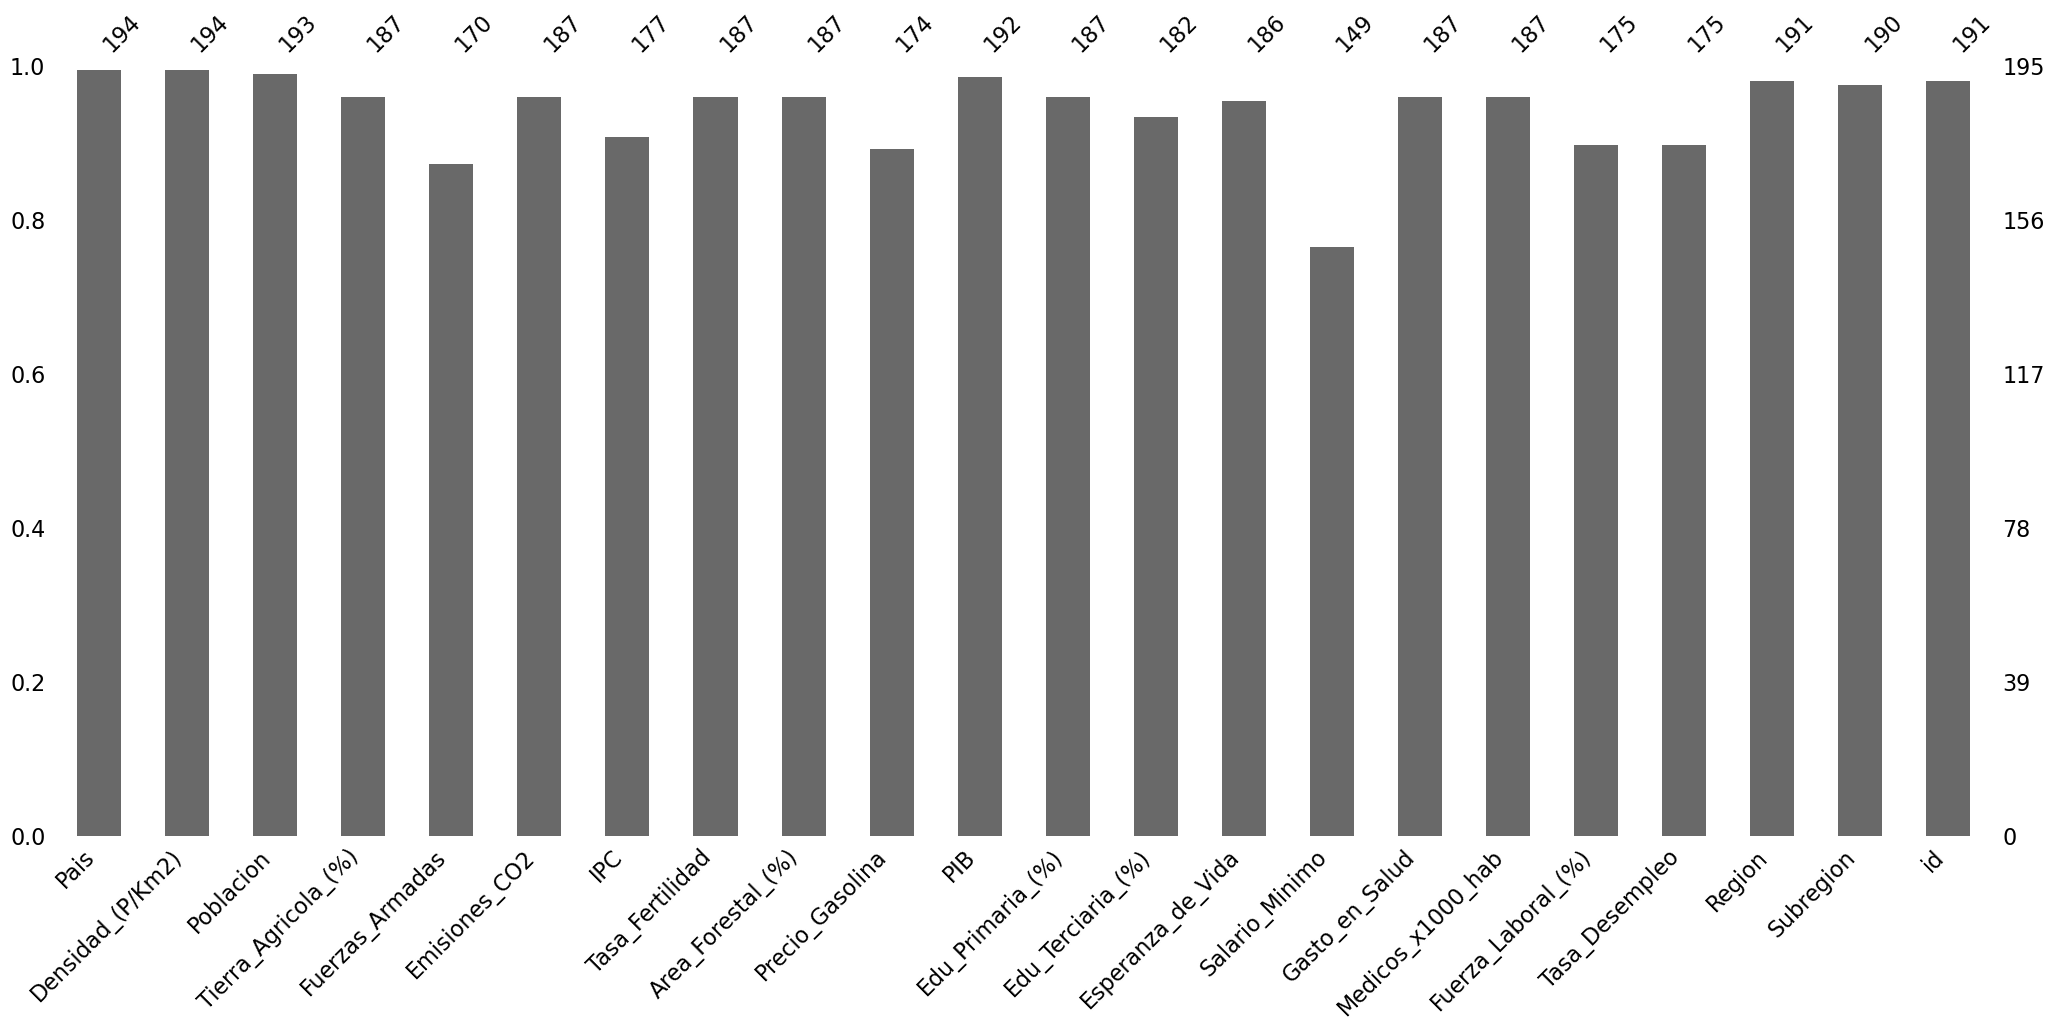

In [12]:
df_sin_nulos = df.copy()

print('\033[1m\033[30;47mCantidad de datos completos por variable\033[0m')
missingno.bar(df)

Visualización de datos faltantes


<Axes: >

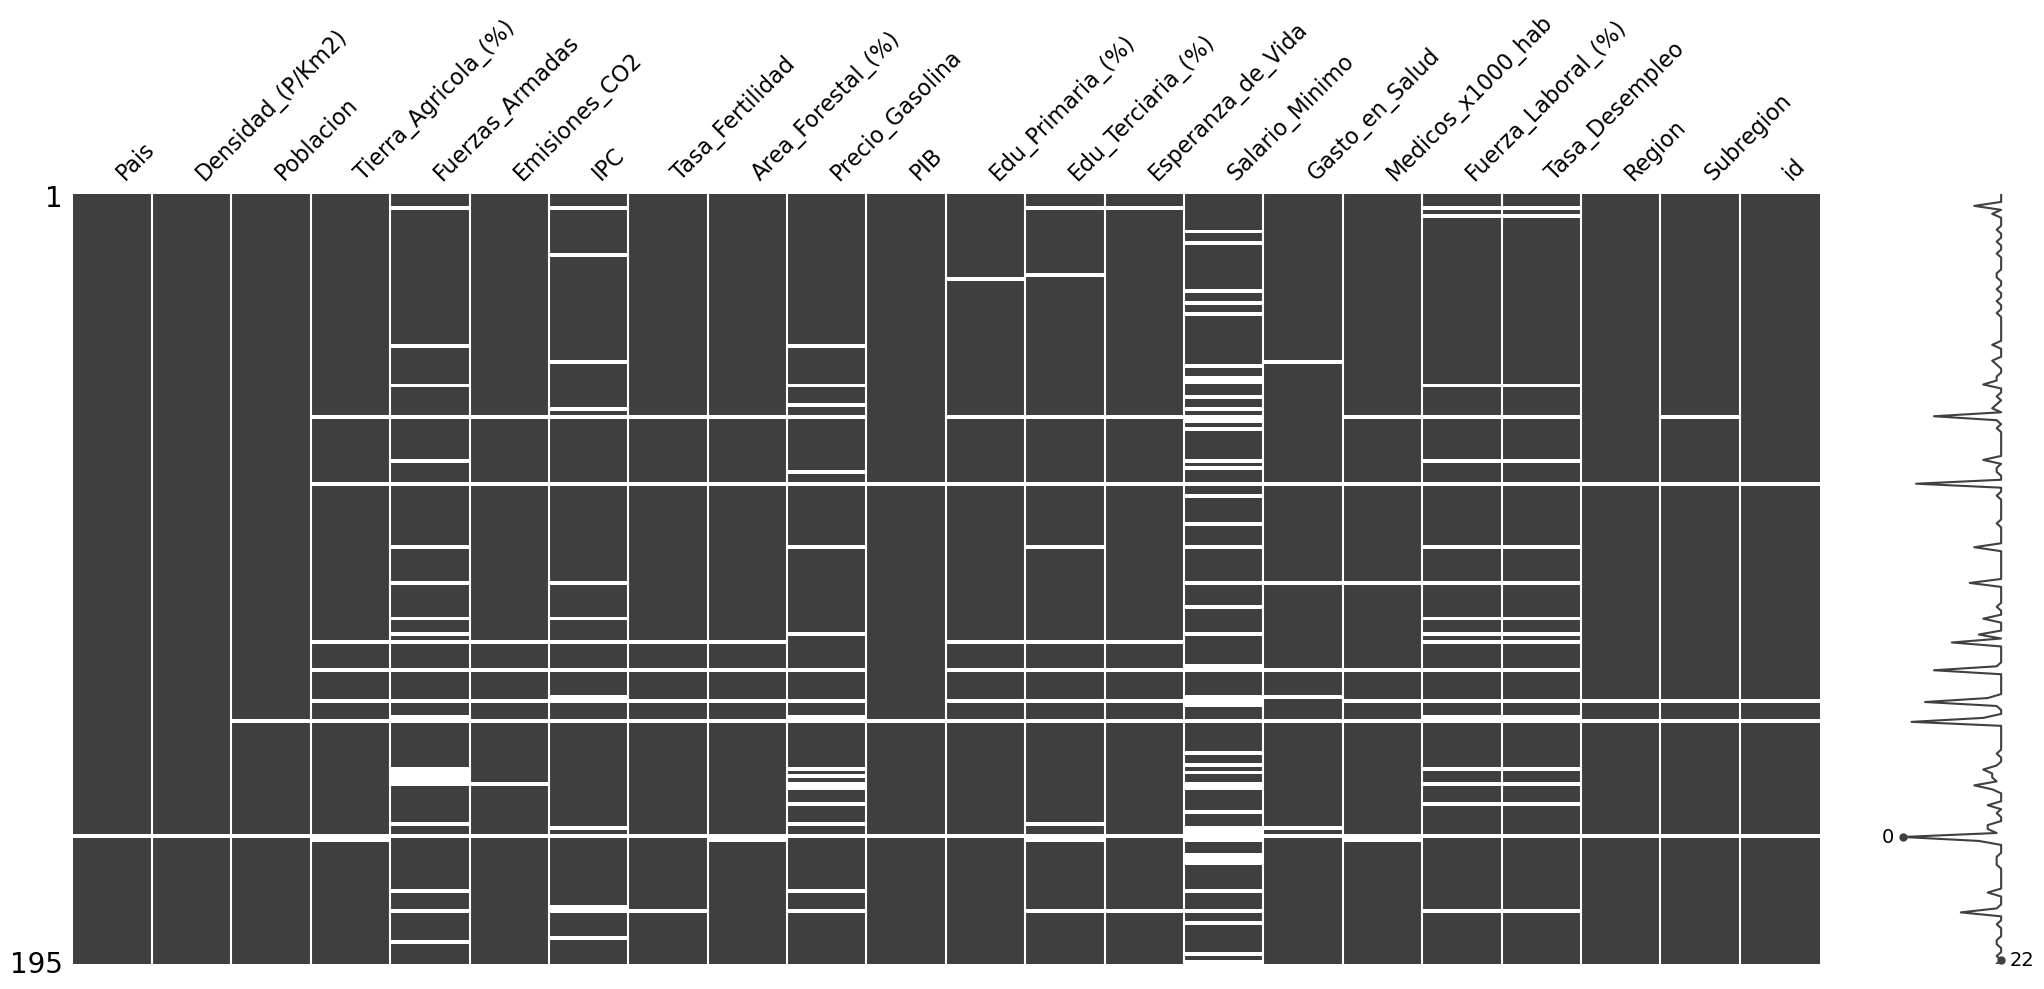

In [13]:
print('\033[1m\033[30;47mVisualización de datos faltantes\033[0m')
missingno.matrix(df)

#### **Manipulación de datos faltantes**

##### **Eliminación de datos faltantes con base a varias variables**

--> Nueva dimensión del Dataset: (188, 22)
--> 6 Observaciones eliminadas:
 192         Yemen
193        Zambia
194      Zimbabwe
188    Uzbekistan
189       Vanuatu
190     Venezuela
191       Vietnam
Name: Pais, dtype: object
--> Gráfico de nueva composición de datos faltantes:
Visualización de datos faltantes despues de la eliminación


<Axes: >

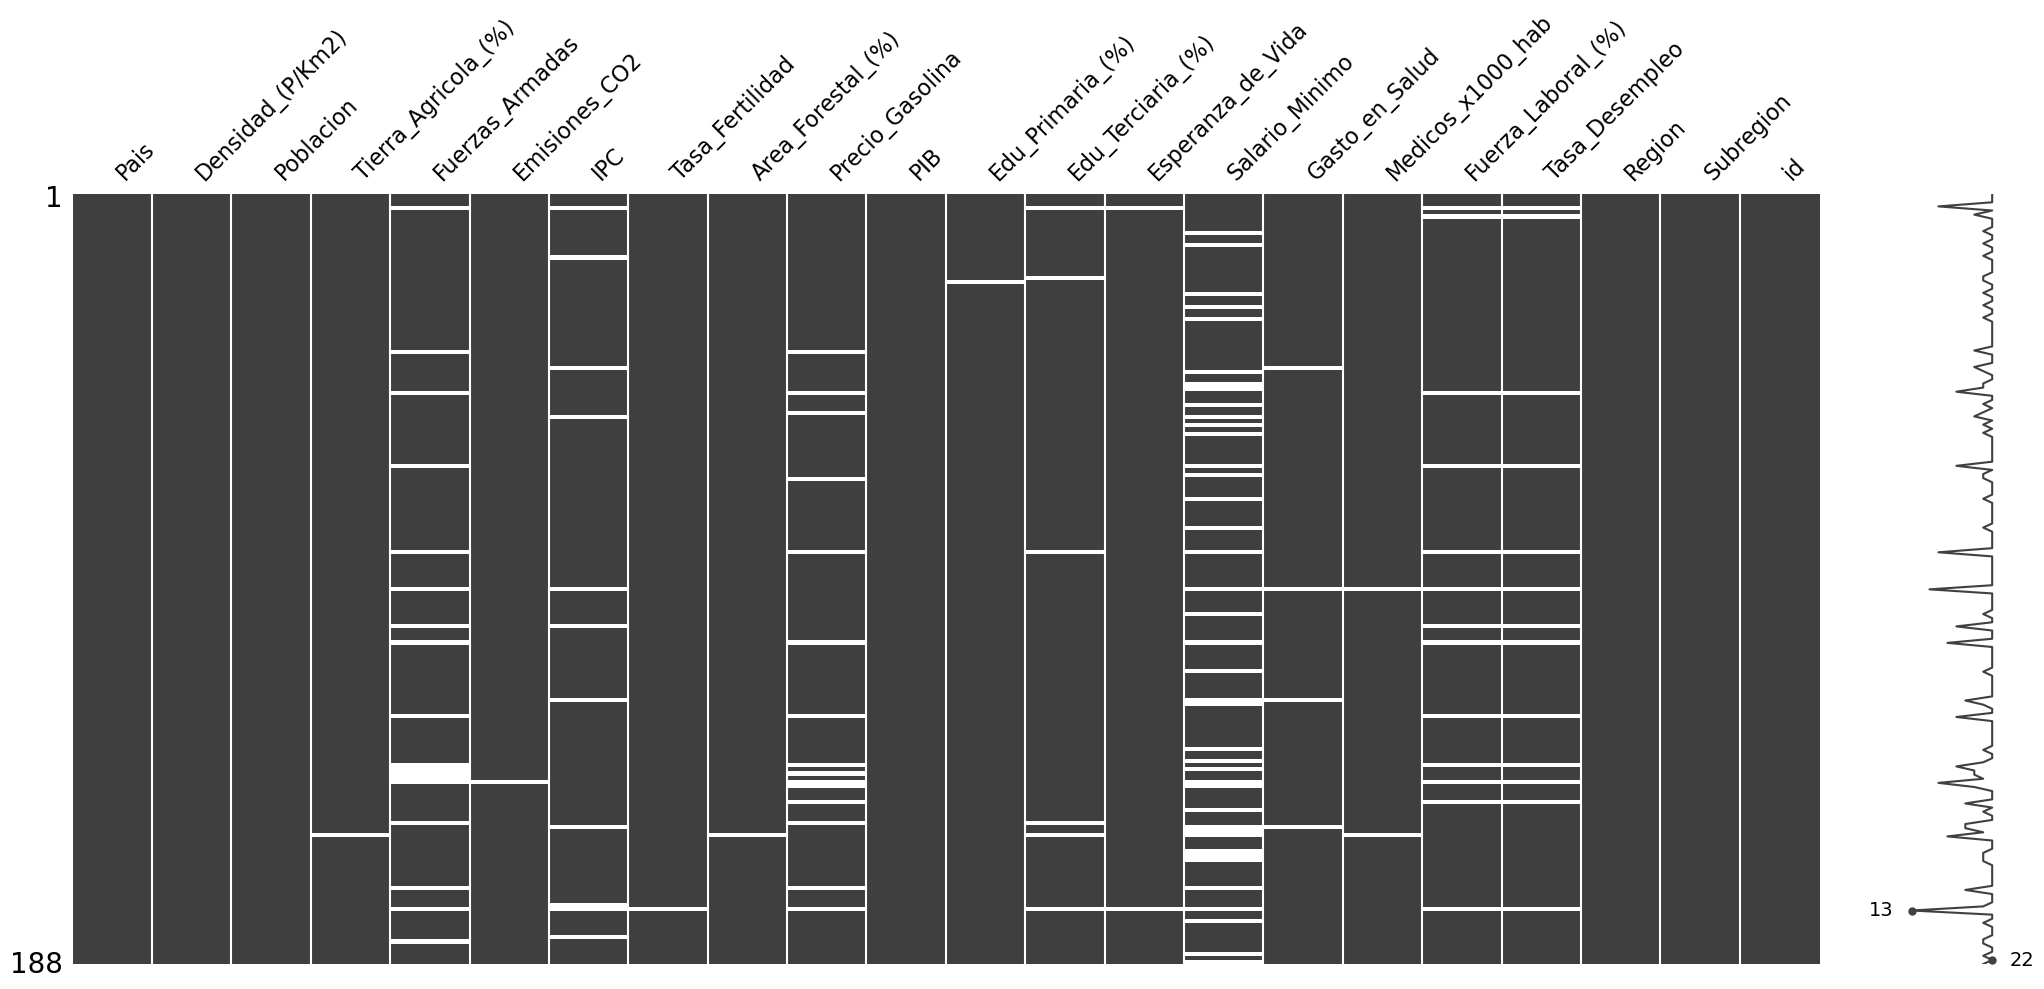

In [14]:
# Elimina filas con valores faltantes en las variables especificadas
df_sin_nulos.dropna(subset=['Esperanza_de_Vida','Edu_Terciaria_(%)','IPC',
                            'Emisiones_CO2','Tierra_Agricola_(%)','Fuerzas_Armadas','Tasa_Fertilidad',
                            'Area_Forestal_(%)','Fuerza_Laboral_(%)'], how='all', inplace=True)
df_sin_nulos.reset_index(inplace=True, drop=True)

print('='*45,'\n--> Nueva dimensión del Dataset:',df_sin_nulos.shape)

# Encuentra los índices de las filas eliminadas
indices_eliminados = list(set(df.index) - set(df_sin_nulos.index))
print('='*45,'\n-->',df['Pais'].count() - df_sin_nulos['Pais'].count(), 'Observaciones eliminadas:\n',
      df.iloc[indices_eliminados]['Pais'])

# Gráfico nueva composición del dataframe
print('='*45,'\n--> Gráfico de nueva composición de datos faltantes:')

print('\033[1m\033[30;47mVisualización de datos faltantes despues de la eliminación\033[0m')

missingno.matrix(df_sin_nulos)

<div style="border: 2px dashed #7FA8F0; padding: 10px;">
  <p><span style="font-size: 3em;">&#128196;</span>Se han excluido países según ciertos criterios que consideran la disponibilidad de datos básicos; esto abarca países soberanos o ciudades independientes, como el Vaticano o Mónaco, que no suministran la mayoría de los datos requeridos, asimismo, se han omitido países relativamente pequeños, para los cuales puede que el creador de la base de datos no haya capturado la información debido a su difícil acceso.
</div>

##### **Imputación de datos faltantes**

- **Revisión de las variables más correlacionadas**

<Figure size 500x500 with 0 Axes>

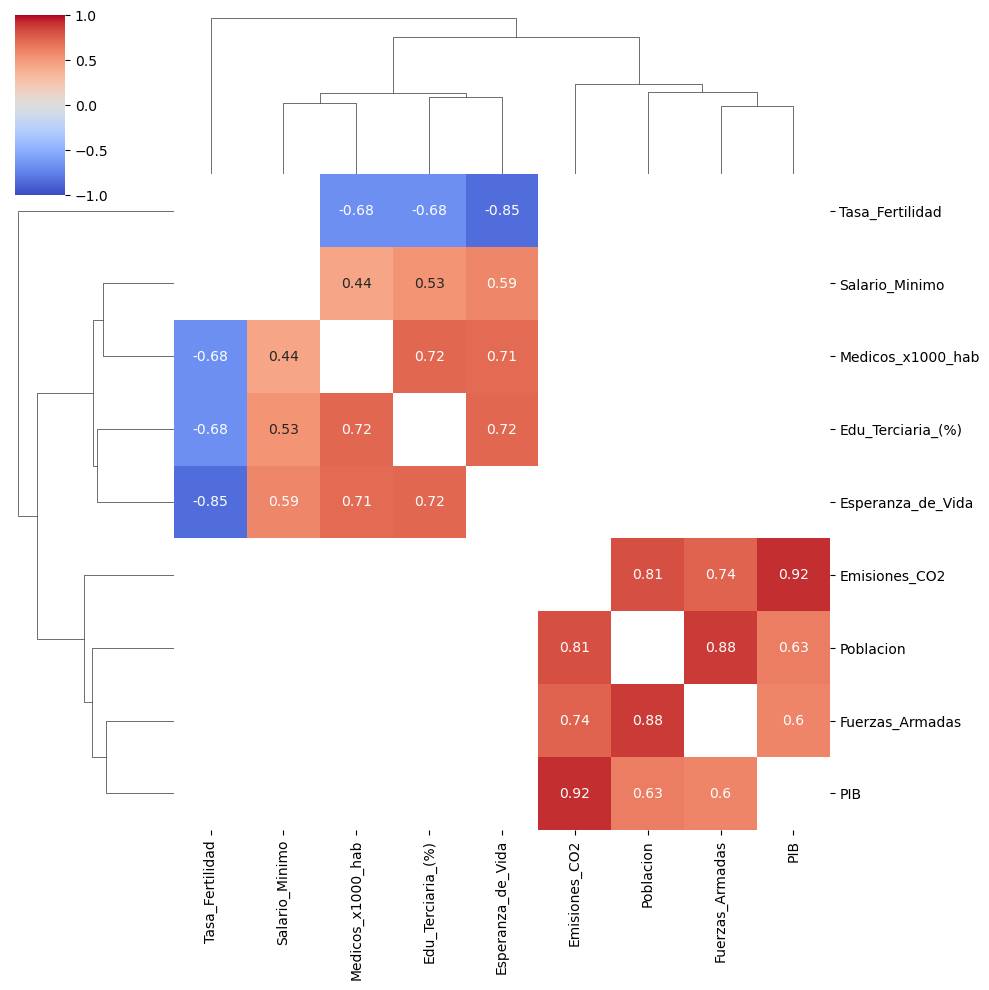

In [15]:
# Calcular la matriz de correlación
df_corr = df_sin_nulos.select_dtypes(exclude='object').corr().round(2)

# Filtrar correlaciones altas
alta_corr = df_corr[(abs(df_corr) >= 0.44) & (df_corr != 1)]
alta_corr.dropna(how='all', inplace=True,axis=1)
alta_corr.dropna(how='all', inplace=True,axis=0)

# Enmascarar los valores cero
alta_corr.fillna(0, inplace=True)

# Crear el clustermap de las variables mas correlacionadas
plt.figure(figsize=(5,5))
sns.clustermap(data=alta_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1,mask = (alta_corr == 0))
plt.show()

<div style="border: 2px dashed #7FA8F0; padding: 10px;">
  <p><span style="font-size: 3em;">&#128196;</span>Previamente, se llevó a cabo un análisis para identificar las variables con una correlación lineal más pronunciada. Esta información se utilizó para imputar los valores faltantes con el método de regresión múltiple simple, con el objetivo de mejorar la precisión de la imputación. Como resultado de este análisis, se destacaron dos conjuntos de variables altamente correlacionadas entre sí, sobre los cuales se aplicará la imputación en dos etapas distintas.
</div>

- **Imputación de datos faltantes por regresión lineal múltiple simple**

Visualización de datos faltantes despues de la imputación


<Axes: >

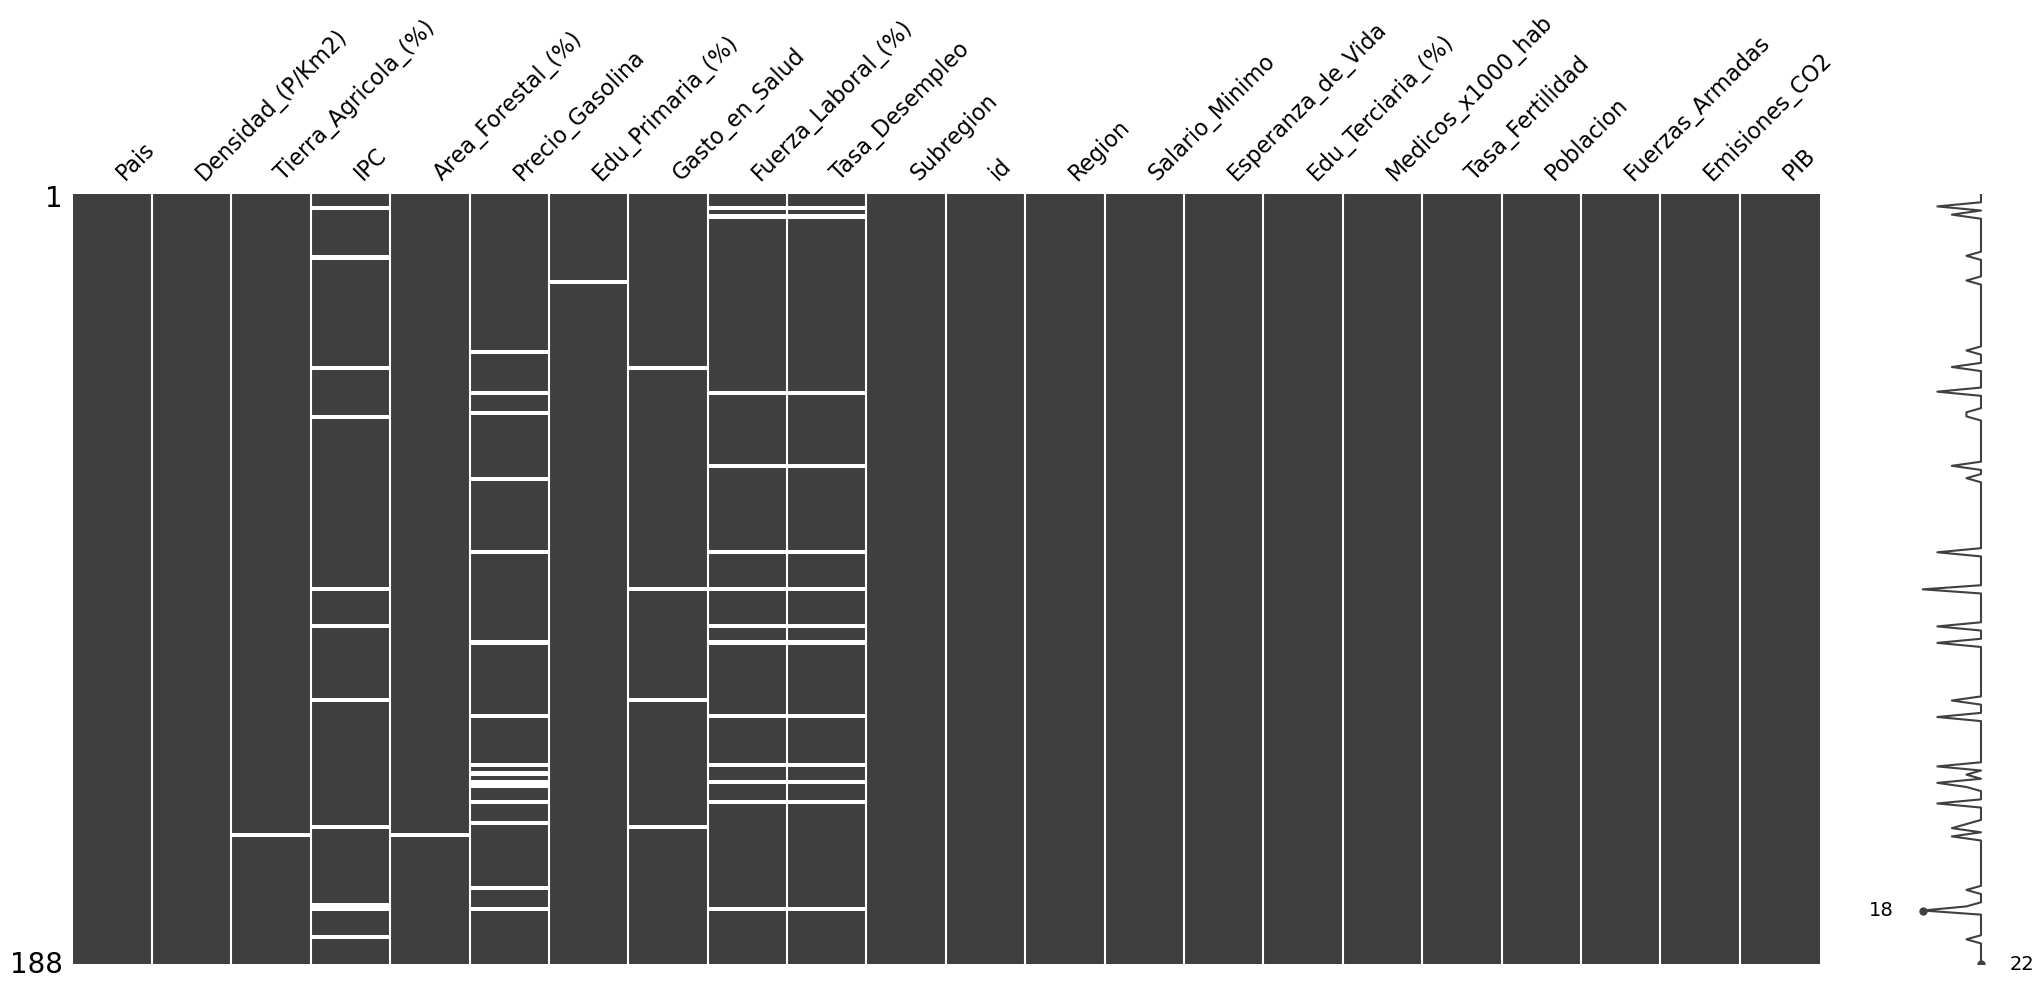

In [16]:
# Creamos una copia del DataFrame original
df_clean = df_sin_nulos.copy()

# Convertir la variable 'Region' a variables ficticias (one-hot encoding)
df_clean = pd.get_dummies(df_clean, columns=['Region'], drop_first=True)

# Dividir el conjunto de datos en dos grupos
Regiones = list(df_clean.filter(regex='Region').columns)
grupo1 = ['Salario_Minimo', 'Esperanza_de_Vida', 'Edu_Terciaria_(%)', 'Medicos_x1000_hab','Tasa_Fertilidad']
grupo2 = ['Poblacion', 'Fuerzas_Armadas', 'Emisiones_CO2', 'PIB']

# Imputar datos faltantes para el grupo 1 usando regresión lineal múltiple
imputer_grupo1 = SimpleImputer(strategy='median')  # Se usa la mediana para los valores faltantes
df_grupo1_imputed = df_clean.copy()
df_grupo1_imputed[grupo1+Regiones] = imputer_grupo1.fit_transform(df_grupo1_imputed[grupo1+Regiones])

# Imputar datos faltantes para el grupo 2 usando regresión lineal múltiple
imputer_grupo2 = SimpleImputer(strategy='median')  # Se usa la mediana para los valores faltantes
df_grupo2_imputed = df_clean.copy()
df_grupo2_imputed[grupo2+Regiones] = imputer_grupo2.fit_transform(df_grupo2_imputed[grupo2+Regiones])

# Eliminar las columnas originales
df_clean.drop(columns=Regiones, inplace=True)
df_clean.drop(columns=grupo1, inplace=True)
df_clean.drop(columns=grupo2, inplace=True)

# Agregar las columnas completas o imputadas al dataframe original df_clean
df_clean['Region'] = df_sin_nulos['Region']
df_clean[grupo1] = df_grupo1_imputed[grupo1]
df_clean[grupo2] = df_grupo2_imputed[grupo2]

print('\033[1m\033[30;47mVisualización de datos faltantes despues de la imputación\033[0m')
missingno.matrix(df_clean)

In [17]:
print('\033[1m\033[30;47mAntes de imputación: descripción de variables\033[0m')
df_sin_nulos[grupo1+grupo2].describe().map(lambda x: format(x, '.1f'))

Antes de imputación: descripción de variables


,Salario_Minimo,Esperanza_de_Vida,Edu_Terciaria_(%),Medicos_x1000_hab,Tasa_Fertilidad,Poblacion,Fuerzas_Armadas,Emisiones_CO2,PIB
count,148.0,186.0,182.0,186.0,187.0,188.0,170.0,187.0,188.0
mean,2.1,72.2,37.7,1.8,2.7,40347111.1,156482.4,175432.9,479083931066.5
std,2.9,7.5,29.0,1.7,1.3,147259205.4,379992.4,840412.6,2197009735697.1
min,0.0,52.8,0.8,0.0,1.1,11646.0,0.0,11.0,47271463.0
25%,0.4,67.0,12.1,0.3,1.7,2302779.0,11000.0,2224.5,9716599897.8
50%,1.0,73.2,30.3,1.4,2.2,9187159.0,30500.0,11973.0,38359679044.5
75%,2.3,77.4,62.8,2.9,3.6,28747013.0,137500.0,62945.5,234992051113.0
max,13.6,85.4,136.6,8.4,6.9,1397715000.0,3031000.0,9893038.0,21427700000000.0


In [18]:
print('\033[1m\033[30;47mDespues de imputación: descripción de variables\033[0m')
df_clean[grupo1+grupo2].describe().map(lambda x: format(x, '.1f'))

Despues de imputación: descripción de variables


,Salario_Minimo,Esperanza_de_Vida,Edu_Terciaria_(%),Medicos_x1000_hab,Tasa_Fertilidad,Poblacion,Fuerzas_Armadas,Emisiones_CO2,PIB
count,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0
mean,1.9,72.2,37.4,1.8,2.7,40347111.1,144420.2,174563.4,479083931066.5
std,2.6,7.4,28.6,1.6,1.3,147259205.4,363148.4,838247.3,2197009735697.1
min,0.0,52.8,0.8,0.0,1.1,11646.0,0.0,11.0,47271463.0
25%,0.5,67.0,12.4,0.3,1.7,2302779.0,12000.0,2304.2,9716599897.8
50%,1.0,73.2,30.3,1.4,2.2,9187159.0,30500.0,11973.0,38359679044.5
75%,1.6,77.3,61.8,2.9,3.6,28747013.0,124500.0,62689.8,234992051113.0
max,13.6,85.4,136.6,8.4,6.9,1397715000.0,3031000.0,9893038.0,21427700000000.0


<div style="border: 2px dashed #7FA8F0; padding: 10px;">
  <p><span style="font-size: 3em;">&#128196;</span>Al comparar los valores antes y después de la imputación, se observó que las medias y los rangos intercuartílicos experimentaron ligeras variaciones, especialmente en aquellas variables con más datos faltantes. Estas diferencias se deben a la elección de utilizar la mediana como estrategia de imputación, la cual fue seleccionada para mitigar el sesgo ocasionado por valores atípicos extremos, y a pesar de estas variaciones, se puede afirmar que los datos mantienen consistencia, garantizando así la coherencia de la imputación mediante regresión múltiple simple y limitándola únicamente a aquellas variables que están relacionadas entre sí.
</div>

# **Exploración de los datos**

### **Parámetros y métricas descriptivas**

##### **Variables numéricas** 

Cantidad de datos, media, desviación estándar, mínimo, máximo y percentiles 25, 50 y 75.

In [19]:
df_clean.describe(exclude=object).T.map(lambda x: format(x, '.1f'))

,count,mean,std,min,25%,50%,75%,max
Densidad_(P/Km2),188.0,208.3,656.1,2.0,33.5,85.5,205.2,8358.0
Tierra_Agricola_(%),187.0,39.2,21.8,0.6,22.0,39.7,55.7,82.6
IPC,177.0,190.9,399.0,99.0,113.8,125.6,157.6,4583.7
Area_Forestal_(%),187.0,31.8,23.7,0.0,11.0,31.8,48.0,98.3
Precio_Gasolina,173.0,1.0,0.4,0.0,0.8,1.0,1.2,2.0
Edu_Primaria_(%),187.0,102.5,13.2,23.4,99.2,102.6,108.0,142.5
Gasto_en_Salud,184.0,32.9,19.2,0.2,17.6,30.7,44.5,81.6
Fuerza_Laboral_(%),175.0,62.7,10.5,38.0,56.1,62.3,69.6,86.8
Tasa_Desempleo,175.0,6.9,5.1,0.1,3.4,5.4,9.5,28.2
Salario_Minimo,188.0,1.9,2.6,0.0,0.5,1.0,1.6,13.6


##### **Variables categóricas** 

Cantidad, cantidad de valores únicos, moda y frecuencia de la moda.

In [20]:
df_clean.describe(include=object)

,Pais,Subregion,id,Region
count,188,188,188,188
unique,188,20,188,5
top,Afghanistan,Latin America and the Caribbean,AFG,Africa
freq,1,33,1,53


##### **Matriz de correlación**

<Figure size 2000x2000 with 0 Axes>

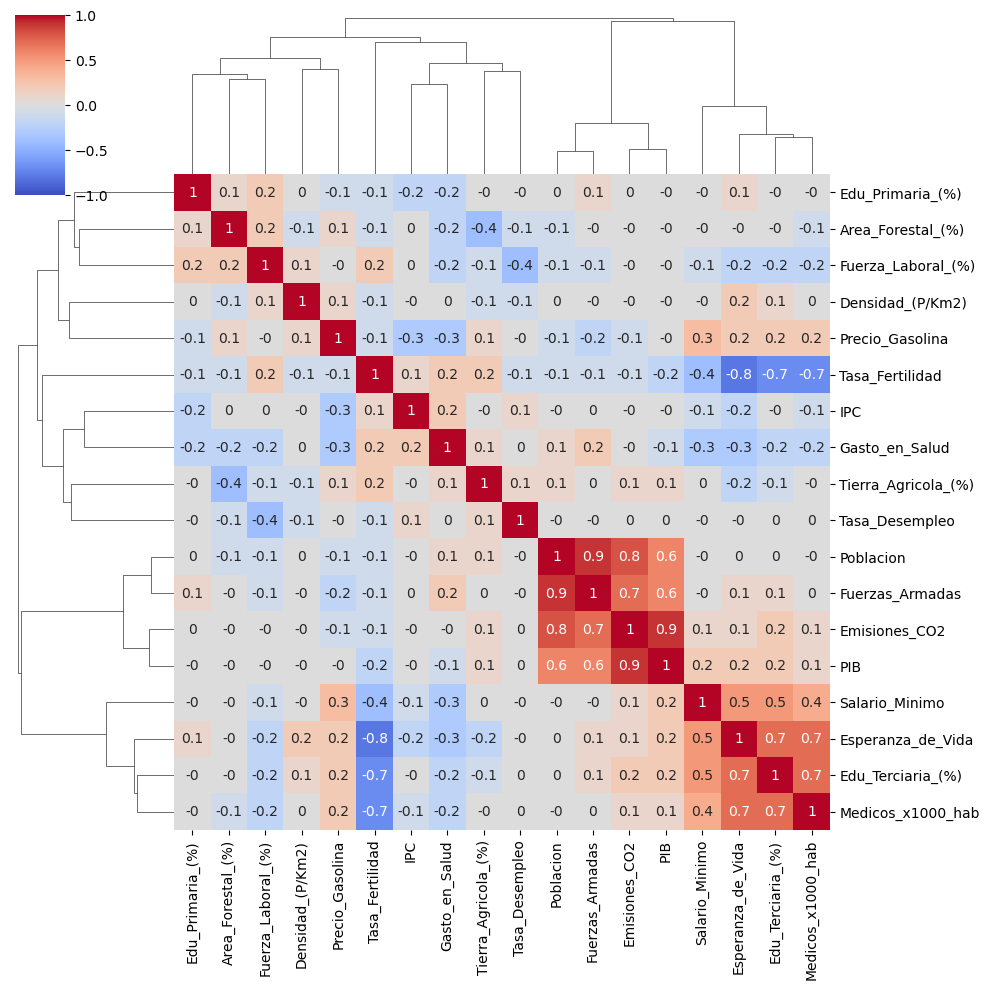

In [21]:
plt.figure(figsize=(20,20))
sns.clustermap(data=df_clean.select_dtypes(exclude='object').corr().round(1), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

##### **Análisis de métricas descriptivas**

<div style="border: 2px dashed #A07FF0; padding: 10px;">
<p><span style="font-size: 3em;">&#x1F4AD;</span>La mayoría de las métricas pueden generar desequilibrios entre los países debido a la presencia de valores atípicos, los cuales están respaldados por desviaciones estándar. Esto sugiere que cada país exhibe dinámicas únicas en áreas como la salud, la economía, el territorio, el medio ambiente, entre otras.

La matriz de correlación de Pearson revela distintas franjas en las cuales un conjunto de variables están correlacionadas de manera lineal, resaltando relaciones específicas entre las variables:

- **Primer grupo:** compuesto por 'salario minimo', 'Esperanza de vida', 'Educación terciaria (%)', 'Medicos por cada 1000 habitantes' y 'Tasa de fertilidad', el que se puede plantiar la hipotesis de que en los países con una mayor proporción de personas cursando estudios superiores, se podría esperar un salario mínimo más elevado, esta suposición se fundamenta en la idea de que una población más educada suele tener una fuerza laboral más calificada y diversificada, lo que podría influir en la fijación de los salarios. Además, la presencia de un mayor número de profesionales educados, como médicos, podría contribuir a una mejor atención médica para la población, lo que, a su vez, podría asociarse con una mayor esperanza de vida en esos países. Por otro lado la tasa de fertilidad indica que en los países con menos hijos, suele haber una población más educada y una mejor atención médica, gracias a la disponibilidad de plazas universitarias y una mayor capacidad médica.

- **Segundo grupo:** compuesto por 'Población', 'Fuerzas Armadas', 'Emisiones de CO2' y 'Producto Interno Bruto (PIB)', se plantea la hipótesis de que estas relaciones están influenciadas por las dinámicas económicas. Se sugiere que los países con una economía más robusta respaldada por un alto Producto Interno Bruto (PIB) podrían tener una mayor industrialización, lo que podría resultar en emisiones de CO2 más elevadas debido a la actividad industrial. Además, la mano de obra abundante en diversos sectores de la economía y el aumento del consumo, como el de vehículos y productos de consumo, también podrían contribuir a las emisiones de CO2. Por otro lado, se plantea que las grandes potencias son las únicas capaces de mantener fuerzas armadas sólidas, ya que los países menos desarrollados tienden a distribuir sus ingresos en áreas más prioritarias.

Lo anterior son hipótesis basadas en estadísticas descriptivas. Un análisis más detallado es necesario para confirmarlas y comprender mejor las complejidades de las relaciones entre las variables.
</div>

### **Exploración del bienestar**

##### **Visualización global de la esperanza de vida**

In [22]:
# georeferencia
geo = requests.get("https://raw.githubusercontent.com/python-visualization/folium-example-data/main/world_countries.json").json()
mapa = folium.Map(location=[30, 0], zoom_start=2)

# Gráfico global
folium.Choropleth(geo_data=geo,
                  name="Esperanza_de_Vida",
                  data=df_clean,
                  columns=['id','Esperanza_de_Vida'], 
                  key_on="feature.id",
                  fill_color="PuBuGn",
                  fill_opacity=0.7,
                  line_opacity=0.2,
                  legend_name="Esperanza_de_Vida"
                  ).add_to(mapa)
folium.LayerControl().add_to(mapa)

mapa

<div style="border: 2px dashed #7FF0B2; padding: 10px;">
    <p><span style="font-size: 2.5em;">🔍</span> En el mapa mundial, se evidencia que la esperanza de vida suele seguir patrones continentales, con pocas excepciones en algunos casos particulares.
</div>

##### **Variación de la esperanza de vida por continente**

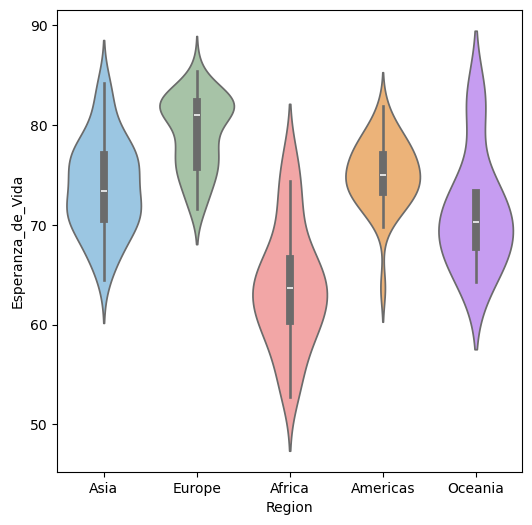

In [23]:
# Definir la paleta de colores pasteles por región
paleta_pastel_por_region = {'Asia': '#8FC8EE', 'Europe': '#A3C7A3', 'Americas': '#FFB366','Africa': '#FF9999','Oceania': '#C68FFF'}

plt.figure(figsize=(6,6))
sns.violinplot(data=df_clean, y='Esperanza_de_Vida',x='Region',hue='Region',palette=paleta_pastel_por_region)
plt.show()

<div style="border: 2px dashed #7FF0B2; padding: 10px;">
    <p><span style="font-size: 2.5em;">🔍</span> Al analizar la visualización por continente, se evidencia una clara tendencia en la esperanza de vida de cada uno. Europa destaca como el continente con la mayor esperanza de vida, mientras que África muestra la menor. En Europa, la distribución se concentra con una cola hacia la izquierda, lo que indica que la mayoría de sus países disfrutan de una buena esperanza de vida, y en otros continentes se observa una distribución más cercana a la normal. Por último, África exhibe una curtosis platicúrtica, lo que sugiere una mayor dispersión en la esperanza de vida debido a la presencia de países con valores más variados en este indicador. En el próximo análisis se examinará detalladamente África para comprender cómo se comportan sus subregiones
</div>

##### **Detalle de la variación de la esperanza de vida en África**

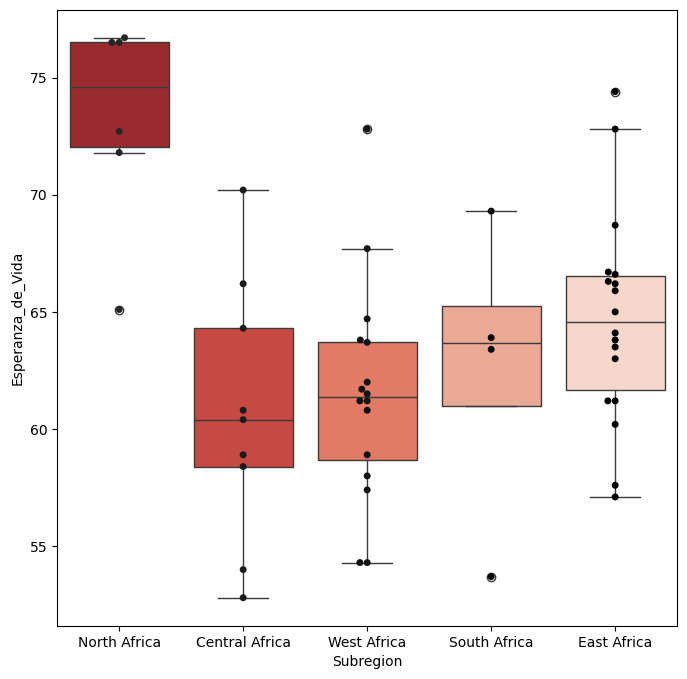

In [24]:
Africa = df_clean[df_clean['Region']=='Africa']

plt.figure(figsize=(8,8))
sns.boxplot(data=Africa, y='Esperanza_de_Vida',x='Subregion',hue='Subregion', palette='Reds_r' , saturation=0.7)
sns.swarmplot(data=Africa, y='Esperanza_de_Vida',x='Subregion',hue='Subregion', palette='dark:k')
plt.show()

<div style="border: 2px dashed #7FF0B2; padding: 10px;">
    <p><span style="font-size: 2.5em;">🔍</span> Al profundizar en África, el continente con la mayor varianza en comparación con otros, se observa que los países del norte exhiben una esperanza de vida más alta, particularmente aquellos cercanos a Europa. Además, las otras subregiones también muestran una dispersión entre los países, pero de manera más concentrada y comprensible que al considerar todo el continente como una entidad única.
</div>

##### **Vinculando Esperanza de Vida, Educación y Acceso Médico**

In [25]:
fig = px.scatter_3d(df_clean, x='Esperanza_de_Vida', y='Edu_Terciaria_(%)', 
                    z='Medicos_x1000_hab',color='Region', opacity=1, 
                    size=np.full(len(df_clean), 1), size_max=15, 
                    title="Diagrama de dispersión del bienestar",
                    color_discrete_map=paleta_pastel_por_region)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.update_layout(scene_camera=dict(eye=dict(x=-1.5, y=1.5, z=0.3)))

fig.show()

<div style="border: 2px dashed #7FF0B2; padding: 10px;">
    <p><span style="font-size: 2.5em;">🔍</span> La representación gráfica tridimensional de la dispersión entre las variables 'Esperanza de vida', 'Médicos por cada 1000 habitantes' y 'Proporción de Educación Terciaria', junto con una variable cromática que distingue los continentes, revela un patrón evidente. Se observa que los países con menor esperanza de vida también presentan menor proporción de educación terciaria y un menor número de médicos por habitante, especialmente destacado en el continente africano, lo cual sugiere posibles dificultades en el acceso a la salud y a la educación, factores que probablemente influyen en la esperanza de vida. En contraste, los demás continentes muestran una dispersión mayor en relación a estas tres variables, aunque en conjunto presentan una tendencia leve. En análisis posteriores, se profundizará en las variables relacionadas con la salud y la educación.
</div>

##### **Impacto de la tasa de fertilidad**

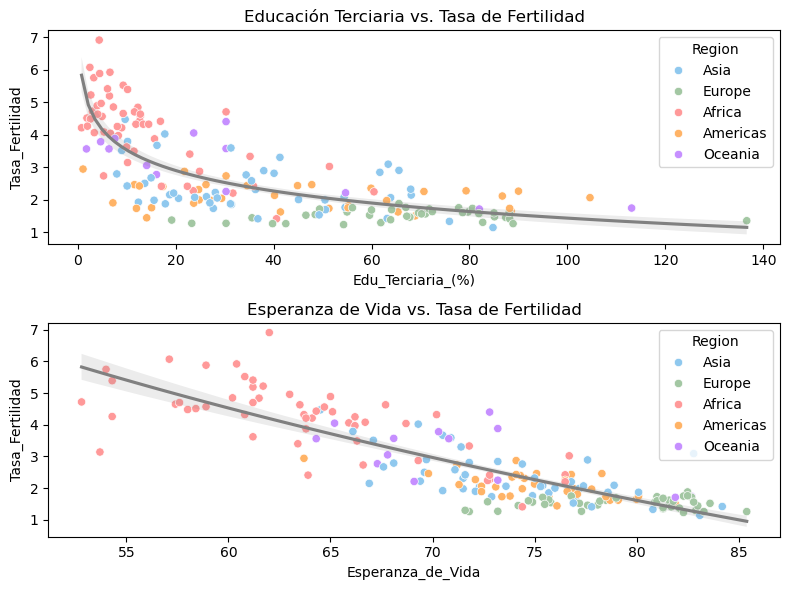

In [26]:

# Crear la figura y los subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Grafico 1
sns.scatterplot(data=df_clean, x='Edu_Terciaria_(%)', y='Tasa_Fertilidad', hue='Region', palette=paleta_pastel_por_region, ax=axs[0])
sns.regplot(data=df_clean, x='Edu_Terciaria_(%)', y='Tasa_Fertilidad', scatter=False, logx=True, color='grey', ax=axs[0])
axs[0].set_title('Educación Terciaria vs. Tasa de Fertilidad')

# Grafico 2
sns.scatterplot(data=df_clean, x='Esperanza_de_Vida', y='Tasa_Fertilidad', hue='Region', palette=paleta_pastel_por_region, ax=axs[1])
sns.regplot(data=df_clean, x='Esperanza_de_Vida', y='Tasa_Fertilidad', scatter=False, logx=True, color='grey', ax=axs[1])
axs[1].set_title('Esperanza de Vida vs. Tasa de Fertilidad')

plt.tight_layout()
plt.show()

<div style="border: 2px dashed #7FF0B2; padding: 10px;">
<p><span style="font-size: 2.5em;">🔍</span>La exploración revela una relación inversa marcada entre la proporción de personas inscritas en educación superior y la tasa de fertilidad; este patrón sugiere la posible influencia de factores socioeconómicos y culturales en las decisiones sobre la fertilidad. Es factible que la población, al priorizar el crecimiento profesional antes que la formación de una familia, juegue un papel importante en esta dinámica.

La relación inversa entre la tasa de fertilidad y la esperanza de vida sugiere un patrón arraigado en el tiempo, posiblemente influenciado por factores socioeconómicos o políticas públicas sobre el control de natalidad. Este fenómeno impacta la estructura demográfica, ya que cuando la tasa de fertilidad disminuye y la esperanza de vida aumenta, la estructura de edad de la población tiende a cambiar, y con menos nacimientos y más longevidad significan que la población tenderá a envejecer.Esto puede tener implicaciones importantes para la economía, la atención médica y otros aspectos de la sociedad.
    
</div>

### **Normalización de variables**

##### **Escalamiento con RobustScaler**

<div style="border: 2px dashed #7FA8F0; padding: 10px;">
  <p><span style="font-size: 2.5em;">&#128196;</span>Algunas variables en el conjunto de datos presentan un rango considerable y complejo en comparación con otras, y esta disparidad dificulta el análisis y la visualización de su dispersión con respecto a las demás variables. Las variables son 'Densidad (población/km2)', 'Población', 'Fuerzas Armadas', 'Emisiones de CO2', 'IPC (Índice de Precios al Consumidor)' y 'PIB (Producto Interno Bruto)', las cuales muestran una concentración sesgada hacia la izquierda y presentan valores atípicos muy extremos hacia la derecha. 

  Para abordar este desafío y mejorar la distribución de estas variables, se aplicó previamente una transformación logarítmica, para reducir la influencia de los valores extremos y mejorar la simetría de la distribución, facilitando así el análisis de los datos. Posteriormente, se optó por el método RobustScaler debido a su capacidad para manejar eficazmente valores atípicos extremos al estandarizar las características de un conjunto de datos, ya que utiliza la mediana y el rango intercuartílico (IQR) en lugar de la media y la desviación estándar, lo que lo hace especialmente útil al trabajar con conjuntos de datos que contienen valores extremos.
</div>

In [27]:
# Variables para escalar
variables_s=['PIB','IPC','Densidad_(P/Km2)','Poblacion','Fuerzas_Armadas','Emisiones_CO2']

# Transformación logarítmica a las variables seleccionadas
df_clean_log = df_clean.copy()
df_clean_log[variables_s] = np.log1p(df_clean_log[variables_s])

# Escala las variables transformadas usando RobustScaler
scaler = RobustScaler()
s = df_clean_log[variables_s]
s = pd.DataFrame(scaler.fit_transform(s), columns=variables_s)

# Organizar dataFrame con las variables escaladas
df_s = df_clean.copy()
df_s.drop(variables_s, axis=1)
df_s[variables_s]=s[variables_s]

##### **Relación entre Variables: Comparación de Datos Escalados y Sin Escalar**

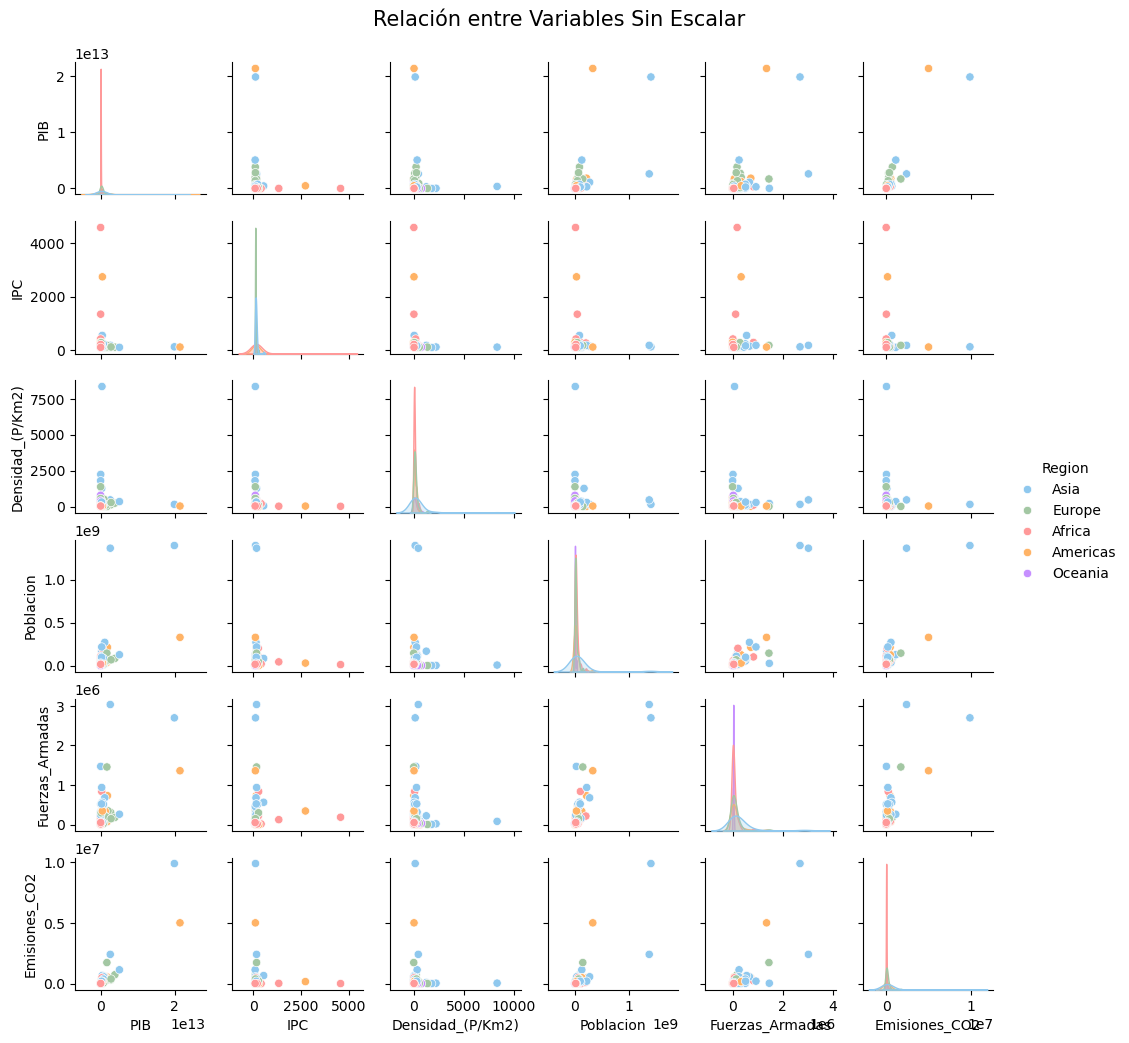

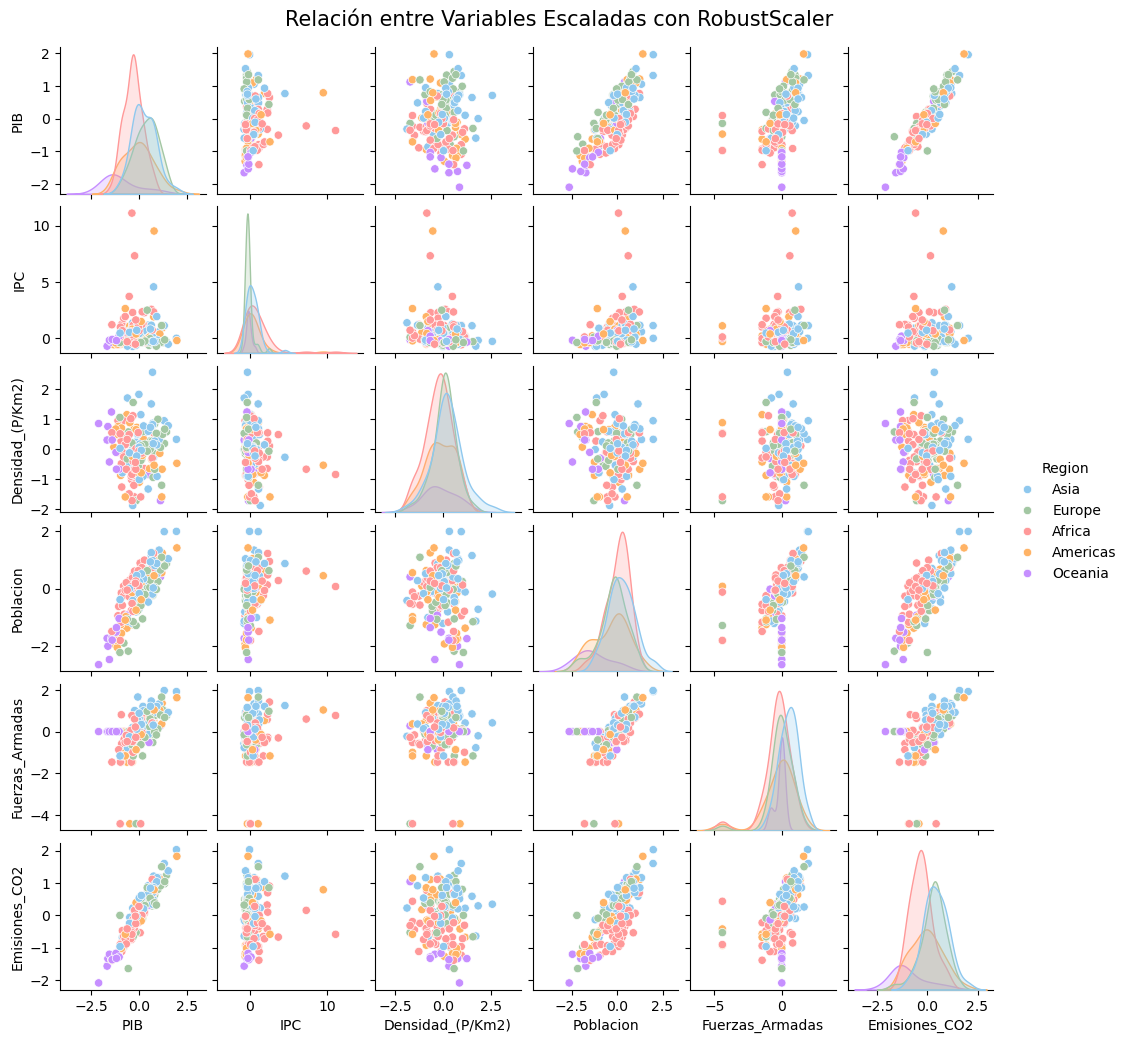

In [28]:
# Gráfico 1: Pairplot sin escalar
pairplot1 =sns.pairplot(data=df_clean[variables_s + list(['Region'])], hue='Region',kind='scatter', palette=paleta_pastel_por_region, height=1.7)
pairplot1.fig.suptitle('Relación entre Variables Sin Escalar',fontsize=15, y=1.02)
plt.show()

# Gráfico 2: Pairplot escalado con RobustScaler
pairplot2 =sns.pairplot(data=df_s[variables_s + list(['Region'])], hue='Region',kind='scatter', palette=paleta_pastel_por_region, height=1.7)
pairplot2.fig.suptitle('Relación entre Variables Escaladas con RobustScaler',fontsize=15, y=1.02)
plt.show()


<div style="border: 2px dashed #7FA8F0; padding: 10px;">
  <p><span style="font-size: 2.5em;">&#128196;</span>Los pairplots anteriores resalta que las variables cuando no están escaladas, resulta difícil detectar comportamientos o patrones entre ellas debido a la presencia de valores atípicos extremos y a su amplio rango de valores, ya que no es posible una buena interpretación visual del impacto de una variable sobre otra. Por el contrario, se aprecia que al escalar las variables, se normalizan a una escala similar, lo que facilita la detección de relaciones entre ellas y la comprensión de los gráficos de densidad de cada variable. Esta normalización permitira realizar análisis visuales más efectivos y proporciona un formato más adecuado para modelos de machine learning, lo que puede mejorar su rendimiento.
</div>

##### **Histogramas de Variables con y sin Estandarización**

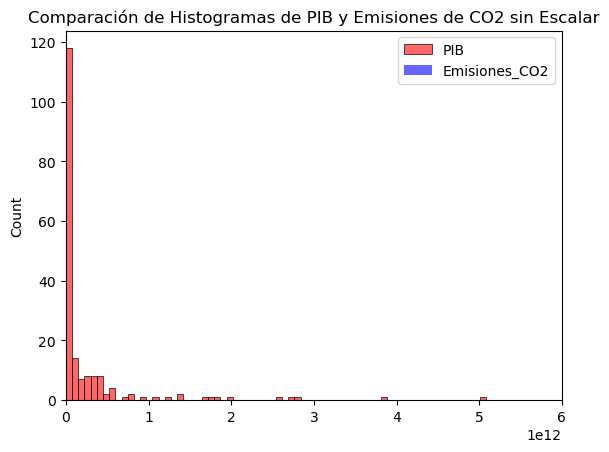

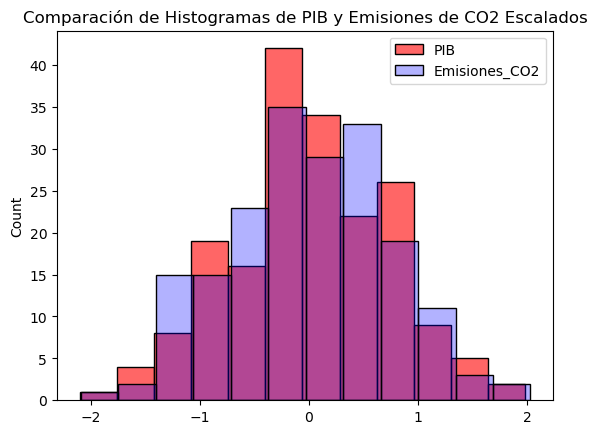

In [29]:
sns.histplot(data=df_clean[df_clean['PIB']/1e13 < 0.6], x='PIB', stat='count', color='red', alpha=0.6, label='PIB')
sns.histplot(data=df_clean[df_clean['PIB']/1e13 < 0.6], x='Emisiones_CO2', stat='count', color='blue', alpha=0.6, label='Emisiones_CO2')
plt.title('Comparación de Histogramas de PIB y Emisiones de CO2 sin Escalar')
plt.xlim(0, 0.6*1e13)
plt.xlabel('')
plt.legend()
plt.show()

sns.histplot(data=df_s, x='PIB', stat='count', color='red', alpha=0.6, label='PIB')
sns.histplot(data=df_s, x='Emisiones_CO2', stat='count', color='blue', alpha=0.3, label='Emisiones_CO2')
plt.title('Comparación de Histogramas de PIB y Emisiones de CO2 Escalados')
plt.xlabel('')
plt.legend()
plt.show()

<div style="border: 2px dashed #7FF0B2; padding: 10px;">
<p><span style="font-size: 2.5em;">🔍</span>Con el escalamiento de variables, ahora es posible comparar el Producto Interno Bruto (PIB) y las emisiones de dióxido de carbono, el cual revela que ambos muestran un comportamiento muy similar y una correlación directa: a medida que aumenta el PIB, también lo hacen las emisiones de dióxido de carbono. Esto sugiere que la actividad económica y el desarrollo de un país tienen un impacto significativo en el medio ambiente; el PIB está estrechamente relacionado con el crecimiento industrial y el consumismo en la población, actividades que contribuyen y aumentan las emisiones de dióxido de carbono.

</div>
    

### **Exploración del Producto Interno Bruto (PIB)**

##### **PIB y Emisiones de CO2 por país**

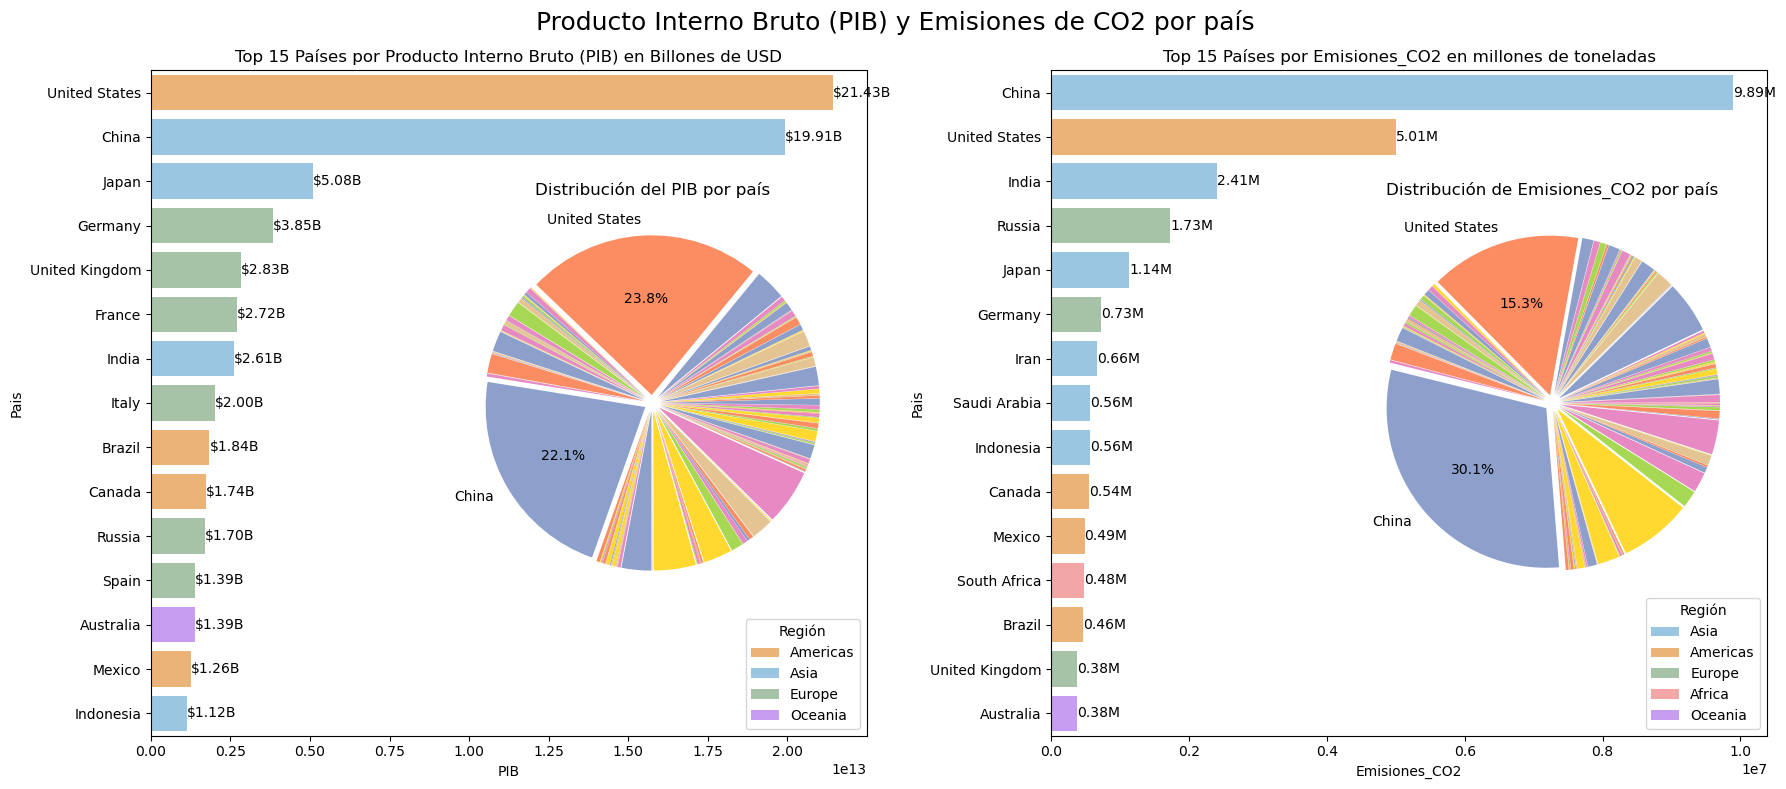

In [30]:
# Top 15 Países por Producto Interno Bruto (PIB)
Top_15_PIB = df_clean[df_clean['PIB'] > 0].nlargest(15, 'PIB').sort_values('PIB', ascending=False)

# Top 15 Países por Emisiones_CO2
Top_15_CO2 = df_clean[df_clean['Emisiones_CO2'] > 0].nlargest(15, 'Emisiones_CO2').sort_values('Emisiones_CO2', ascending=False)

# Crear subplot de una fila por dos columnas
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Producto Interno Bruto (PIB) y Emisiones de CO2 por país', fontsize=18)

# ----> Gráfico 1: Top 15 Países por Producto Interno Bruto (PIB) <----
sns.barplot(ax=axs[0], x='PIB', y='Pais', hue='Region', dodge=False, palette=paleta_pastel_por_region, data=Top_15_PIB)
axs[0].set_title('Top 15 Países por Producto Interno Bruto (PIB) en Billones de USD')
axs[0].legend(title='Región')
for index, value in enumerate(Top_15_PIB['PIB']):                   # Etiquetas
    axs[0].text(value, index, f'${value/10**12:.2f}B', va='center')

# ----> Diagrama de pie del PIB por país <----
axs_pie_pib = axs[0].inset_axes([0.4, 0.2, 0.6, 0.6])   # Ubicación
pie_data_pib = df_clean.groupby('Pais')['PIB'].sum()
axs_pie_pib.set_title('Distribución del PIB por país')
labels_pib = ['' if (val / sum(pie_data_pib)) < 0.2 else label for val, label in zip(pie_data_pib, pie_data_pib.index)] # Omitir labels de paises que no superan el 20% de participación
wedges, texts, autotexts = axs_pie_pib.pie(pie_data_pib, labels=labels_pib, startangle=140, autopct='%1.1f%%', colors=sns.color_palette('Set2_r'), explode=([0.05] * len(pie_data_pib)))
for autotext, label, percentage in zip(autotexts, labels_pib, pie_data_pib / sum(pie_data_pib)):    # Omitir números de paises que no superan el 20% de participación
    if percentage < 0.2:
        autotext.set_visible(False)

# ----> Gráfico 2: Top 15 Países por Emisiones_CO2 <----
sns.barplot(ax=axs[1], x='Emisiones_CO2', y='Pais', hue='Region', dodge=False, palette=paleta_pastel_por_region, data=Top_15_CO2)
axs[1].set_title('Top 15 Países por Emisiones_CO2 en millones de toneladas')
axs[1].legend(title='Región')
for index, value in enumerate(Top_15_CO2['Emisiones_CO2']):         # Etiquetas
    axs[1].text(value, index, f'{value/10**6:.2f}M', va='center')
    
# ----> Diagrama de pie del Emisiones_CO2 por país <----
axs_pie_co2 = axs[1].inset_axes([0.4, 0.2, 0.6, 0.6])   # Ubicación
pie_data_co2 = df_clean.groupby('Pais')['Emisiones_CO2'].sum()
axs_pie_co2.set_title('Distribución de Emisiones_CO2 por país')
labels_co2 = ['' if (val / sum(pie_data_co2)) < 0.1 else label for val, label in zip(pie_data_co2, pie_data_co2.index)] # Omitir labels de paises que no superan el 10% de participación
wedges, texts, autotexts = axs_pie_co2.pie(pie_data_co2, labels=labels_co2, startangle=140, autopct='%1.1f%%', colors=sns.color_palette('Set2_r'), explode=([0.05] * len(pie_data_co2)))
for autotext, label, percentage in zip(autotexts, labels_co2, pie_data_co2 / sum(pie_data_co2)):    # Omitir números de paises que no superan el 10% de participación
    if percentage < 0.1:
        autotext.set_visible(False)

plt.tight_layout()
plt.show()

<div style="border: 2px dashed #7FF0B2; padding: 10px;">
<p><span style="font-size: 2.5em;">🔍</span> Las principales potencias económicas mundiales, encabezadas por Estados Unidos y China, representan conjuntamente el 45.9% del PIB global. Estos dos países también lideran en emisiones de dióxido de carbono, alcanzando el 45.4% a nivel mundial, aunque China tiene un PIB similar al de Estados Unidos, sus emisiones perjudiciales para el medio ambiente son el doble que las de este último.

Otro hallazgo significativo es que, de los quince países con mayor PIB, solo tres no están entre los quince principales emisores de dióxido de carbono, esto evidencia que los países que están en constante desarrollo económico e industrial no están priorizando el cuidado del medio ambiente. Además, estos tres países  muestran un esfuerzo ligeramente mayor que otras potencias al diversificar el consumo y la industria hacia sectores más respetuosos con el medio ambiente, sin embargo, no pueden eximirse por completo de responsabilidad, ya que aún ocupan una posición cercana al top 15 de emisores.
</div>

##### **Categorizar las variable PIB y Emisiones de CO2 en 7 categorías**

In [31]:
# Definir los límites de los intervalos y las etiquetas de las categorías
intervalos = [-float('inf'), -1.8, -1, -0.3, 0.3, 1, 1.8, float('inf')]
categorias = ['Muy Bajo','Bajo', 'Medio-bajo', 'Medio', 'Medio-alto', 'Alto', 'Muy Alto']

# Aplicar la categorización a los datos
df_s['PIB_Categoria'] = pd.cut(df_s['PIB'], bins=intervalos, labels=categorias)
df_s['CO2_Categoria'] = pd.cut(df_s['Emisiones_CO2'], bins=intervalos, labels=categorias)

<div style="border: 2px dashed #7FA8F0; padding: 10px;">
  <p><span style="font-size: 2.5em;">&#128196;</span>Se propone categorizar las variables del Producto Interno Bruto y las emisiones de CO2 con el fin de explorar desde otra perspectiva cómo se agrupan los países. En lugar de centrarse en las distribuciones en términos de billones de dólares o toneladas de dióxido de carbono, este enfoque busca analizar la distribución mundial de países según estos indicadores. Esto permitirá un análisis más amplio de la economía y el impacto ambiental a nivel global.
</div>

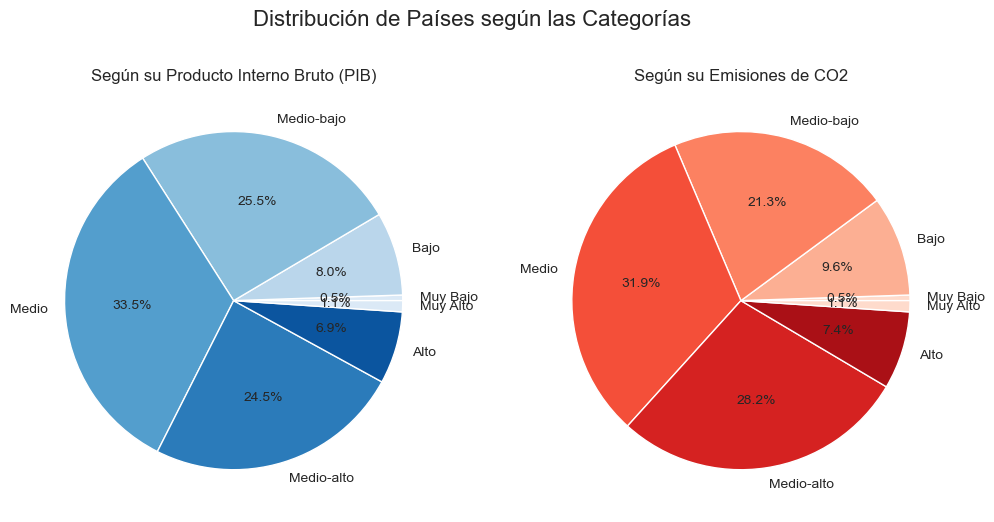

In [32]:
# Agrupar las categorias
df_g_PIB = df_s.groupby('PIB_Categoria', observed=False).agg({'Pais':'count'}).reset_index()
df_g_CO2 = df_s.groupby('CO2_Categoria', observed=False).agg({'Pais':'count'}).reset_index()

# Configurar estilo de Seaborn
sns.set_style("whitegrid")

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle('Distribución de Países según las Categorías', fontsize=16)

# Gráfico de PIB
axs[0].pie(df_g_PIB['Pais'], labels=df_g_PIB['PIB_Categoria'], autopct='%1.1f%%', colors=sns.color_palette("Blues"))
axs[0].set_title('Según su Producto Interno Bruto (PIB)')

# Gráfico de CO2
axs[1].pie(df_g_CO2['Pais'], labels=df_g_CO2['CO2_Categoria'], autopct='%1.1f%%', colors=sns.color_palette("Reds"))
axs[1].set_title('Según su Emisiones de CO2')


plt.show()

<div style="border: 2px dashed #7FF0B2; padding: 10px;">
<p><span style="font-size: 2.5em;">🔍</span> En comparación con el análisis anterior sobre los PIB en billones de USD y las toneladas de dióxido de carbono (CO2), donde solo dos  países representaban cerca del 45% del total a nivel mundial, estos países representan solo el 1.1% del número total de países a nivel mundial, este hecho se refleja en el gráfico en la categoría "Muy Alto" tanto para el PIB como para el CO2. Además, se observa que, en cuanto al PIB, la distribución está bastante equilibrada entre los países con un PIB inferior y los de PIB superior, sin embargo, en cuanto a las emisiones de dióxido de carbono, hay una tendencia ligeramente mayor hacia los países que emiten más CO2, lo cual es preocupante, ya que sugiere que una parte considerable de los países están contribuyendo significativamente a la contaminación ambiental debido a sus actividades económicas.
</div>

##### **Validar relación del PIB con la región y la Esperanza de vida**

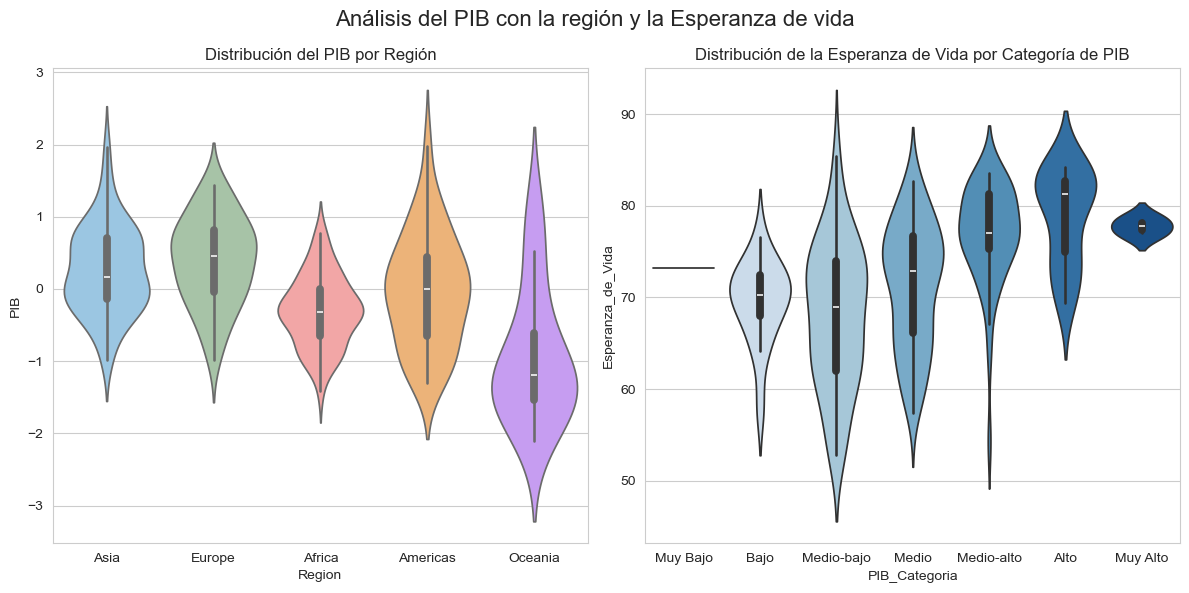

In [33]:
# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1 - PIB por Región
sns.violinplot(data=df_s, y='PIB', x='Region', hue='Region', palette=paleta_pastel_por_region, ax=axes[0])
axes[0].set_title('Distribución del PIB por Región')

# Gráfico 2 - Esperanza de Vida por Categoría de PIB
sns.violinplot(data=df_s, y='Esperanza_de_Vida', x='PIB_Categoria', hue='PIB_Categoria', palette='Blues', ax=axes[1])
axes[1].set_title('Distribución de la Esperanza de Vida por Categoría de PIB')

# Título general
plt.suptitle('Análisis del PIB con la región y la Esperanza de vida', fontsize=16)

# Mostrar los gráficos
plt.tight_layout()
plt.show()

<div style="border: 2px dashed #7FF0B2; padding: 10px;">
<p><span style="font-size: 2.5em;">🔍</span> Al analizar la relación entre el PIB y los continentes, no se observa un patrón claro en el comportamiento económico por continente. Además, al examinar la relación entre el PIB y la esperanza de vida, tampoco se identifica una conexión definida, aunque existe una leve correlación directa, esta es insignificante, por lo tanto, se puede inferir que la economía del pais tiene una influencia limitada en la esperanza de vida, al menos en el contexto analizado.
</div>

# **Discusión de Resultados**

Al analizar los datos, se revelan relaciones entre diversas variables socioeconómicas, tales como la capacidad de atención médica, acceso a educación superior, salario mínimo, tasa de fertilidad y esperanza de vida. Los desequilibrios entre países en estas métricas sugieren la singularidad de cada nación en su desarrollo. Este panorama refuerza la necesidad de políticas y estrategias específicas adaptadas a las dinámicas únicas de cada país. Además, sugiere que la inversión en educación superior y salud podría no solo impulsar el desarrollo humano, sino también mejorar aspectos económicos como el salario mínimo.

Los patrones continentales en la esperanza de vida también arrojan luz sobre desafíos específicos de cada región en términos de salud y desarrollo humano. Mientras Europa lidera en esperanza de vida, África muestra la menor, con variaciones dentro del continente que reflejan realidades socioeconómicas diversas. Esta diversidad geográfica subraya la importancia de abordajes diferenciados según la región para lograr un desarrollo equitativo y sostenible.

Por otro lado, se observa una estrecha relación entre el Producto Interno Bruto (PIB) y las emisiones de dióxido de carbono (CO2), evidenciando el impacto ambiental del crecimiento económico. Las potencias económicas líderes, como Estados Unidos y China, destacan por su contribución significativa tanto al PIB global como a las emisiones de CO2, subrayando una brecha considerable entre desarrollo económico y responsabilidad ambiental.

En el contexto analizado, no se observa una estrecha relación entre la economía de un país y su desarrollo humano, reflejado ya sea en la esperanza de vida, acceso a la salud o acceso a la educación. Estos aspectos parecen ser independientes, pero tampoco se descarta la idea de su relación. Para explorar a fondo posibles hallazgos en esta relación, sería conveniente indagar con más indicadores y con diversificación geográfica por ciudad, lo que permitiría explorar a fondo posibles hallazgos en esta relación o encontrar aspectos relevantes.


# **Conclusiones**

El análisis de estos datos revela la intrincada interconexión entre educación, salud, economía y medio ambiente en el contexto del desarrollo de los países hasta el año 2023. Esta observación resalta la necesidad imperante de políticas integrales que coloquen a la educación y la salud como pilares fundamentales para el crecimiento económico y la equidad social. Además, se destaca la urgencia de acciones globales coordinadas para abordar el desequilibrio evidente entre el desarrollo económico y la sostenibilidad ambiental en un mundo cada vez más interconectado.

El proceso de análisis exploratorio enfrentó diversos desafíos, entre ellos, la falta de estandarización en la nomenclatura y abreviaturas de los países tanto en el conjunto de datos principal como en el complementario. Esto requirió un esfuerzo adicional para establecer nombres y abreviaturas adecuadas que permitieran la unión de tablas y la identificación correcta de los países en los datos georreferenciados. Además, fue necesario abordar la limpieza de datos, incluida la eliminación de observaciones con un alto número de valores nulos y la imputación de variables con datos faltantes que podrían ofrecer información relevante. Posteriormente, se llevaron a cabo diversos análisis utilizando técnicas de estadística descriptiva y visualizaciones detalladas para identificar patrones y tendencias claras en los indicadores representados por los países.

Este análisis no solo proporciona una visión clara del estado actual geopolítico, socioeconómico y ambiental, sino que también sirve como punto de partida para explorar a fondo las desigualdades entre las naciones. Permite comprender mejor los factores que influyen en el desarrollo humano y económico de un país, lo que a su vez puede guiar la formulación de acciones estratégicas para mejorar en todos estos aspectos y promover un desarrollo más equitativo y sostenible a nivel global.

# **Referencias**

- Alex Galea. (2018). Applied Data Science with Python and Jupyter: Use Powerful Industry-standard Tools to Unlock New, Actionable Insights From Your Data: Vol. 1st edition. Packt Publishing. (pp. 29-49).
- Grus, J. (2019). Data science from scratch: first principles with python. O'Reilly Media.
- Samir Madhavan. (2015). Mastering Python for Data Science: Explore the World of Data Science Through Python and Learn How to Make Sense of Data. Packt Publishing. (pp. 77-106).
- Thakur, A. (2016). Python: Real-World Data Science. Packt Publishing. (pp. 536 - 563).